In [247]:
# numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns

# file system manangement
import os

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from utils import *

import cufflinks as cf
cf.go_offline()

---
## **Information about data 'dseb63_application_{train|test}'**
---

#### 1. dseb63_application_train.csv

In [248]:
# read data
app_train = pd.read_csv("D:/Data Preparation final project group 2/Data/dseb63_application_train.csv")

#drop cột ["Unnamed: 0"]
app_train = app_train.drop("Unnamed: 0", axis=1)

# print information about data shape
print('Training data shape: ', app_train.shape)

# print some rows to observe
app_train.head()

Training data shape:  (246009, 122)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,219374


#### 2. dseb63_application_test.csv

In [249]:
# read data test
app_test = pd.read_csv("D:/Data Preparation final project group 2/Data/dseb63_application_test.csv")

#drop cột ["Unnamed: 0"]
app_test = app_test.drop("Unnamed: 0", axis=1)

# print information about data shape
print('Testing data shape: ', app_test.shape)

# print some rows to observe
app_test.head()

Testing data shape:  (61502, 121)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,83659
1,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,174814
2,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,179486
3,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,57038
4,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,25672


- The training data has 246,009 observations (each one a separate loan) and 122 features (variables after drop 'Unnamed: 0' column) including the TARGET (the label we want to predict).

- The test set is considerably smaller and lacks a TARGET column.

---
## **Problem**
- Visualize the distribution of the TARGET value in dataset 'dseb63_application_train.csv'
---

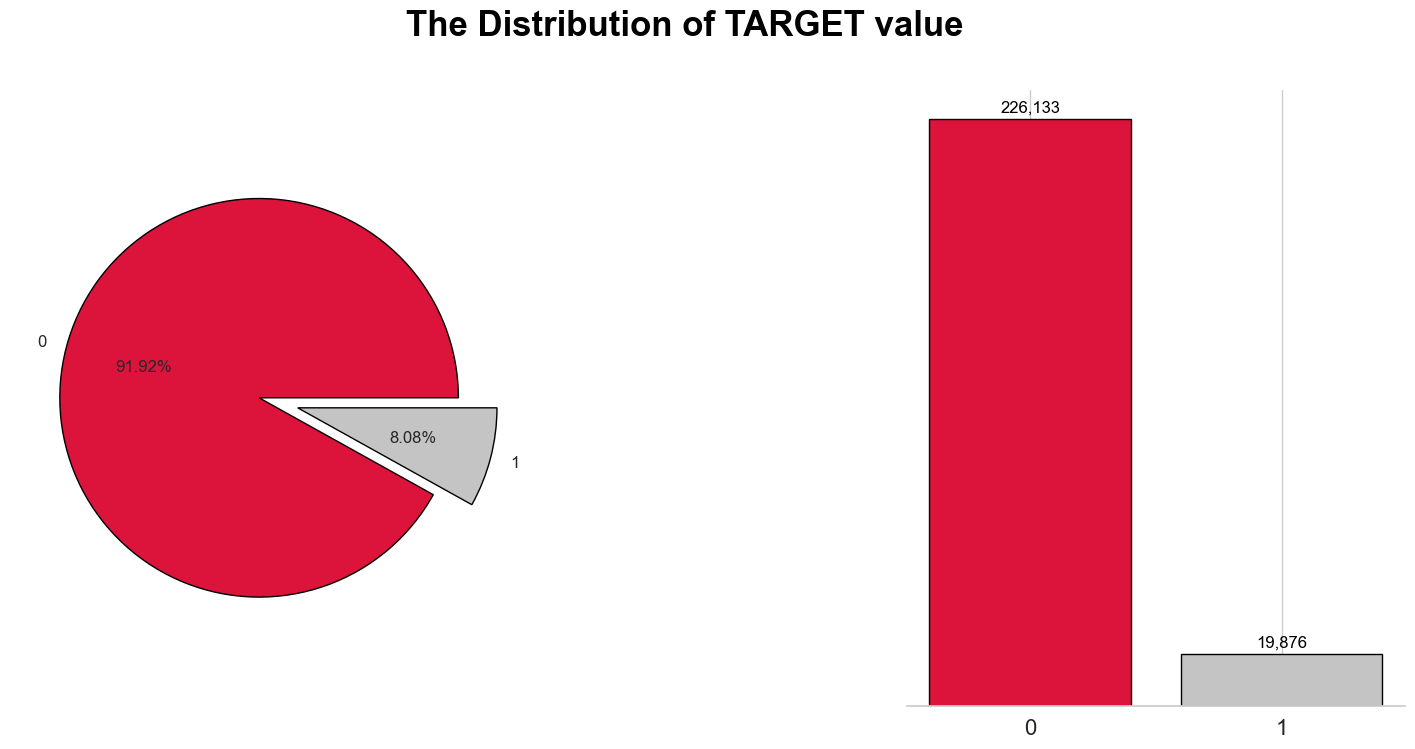

In [250]:
plot_distribution(app_train, 'TARGET')

- TARGET in this data set is imbalanced with the majority of loans being repayable, or in other words individuals having no problem with paying on time.

- There are about **91.9%** of loans with TARGET = 0 (equivalent to 226,133 sets of customer documents), while TARGET = 1 (equivalent to 19,876 sets of customer documents, meaning that customers are having problems in payment on time) only accounts for **8.1%** of the total number of customer records in this data set.


###     Question: **So where does this imbalance come from?**
---
    
Through the dataset **HOME CREDIT DEFAULT RISK** includes data tables covering aspects of a credit file such as:

1. Basic customer profile information: gender, age, income, marital status, education level, ... and many other information.

2. Information related to transactions: including transaction history and consumer credit card shopping behavior - **dseb63_POSH_CASH_balance.csv**

3. Information related to debt payment history: includes customers' past debt payment history if they have had previous loans at Home Credit - **dseb63_installments_payment.csv**

4. Loan information at other financial institutions is stored at the credit bureau - **dseb63_bureau_balance.csv** & **dseb63_bureau.csv**

Let's explore and discover the factors causing this imbalance. Or in other words, discover the factors that affect customers' ability to pay debts on time. This can help banks predict and evaluate each customer's ability to pay, thereby minimizing risks and losses due to bad debt, making effective credit decisions for each customer, and optimizing the credit process. credit management program.

---
## **Exploratory data analysis**
||Contents|
|:------|:----------|
|1. |Classify the datatypes of each columns|
|2. |Check missing values|
|3. |Check anomalies|
|4. |Correlations|
|5. |Explore each unique attributes|

### **1. Classify the datatypes of each columns**

In [251]:
def datatypes_table(df):
    sum_dtype = pd.DataFrame(df.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

In [252]:
table_dtype = datatypes_table(app_train)
table_dtype

,Data Type
TARGET,int64
REG_REGION_NOT_LIVE_REGION,int64
REG_REGION_NOT_WORK_REGION,int64
LIVE_REGION_NOT_WORK_REGION,int64
REG_CITY_NOT_LIVE_CITY,int64
...,...
NAME_INCOME_TYPE,object
NAME_EDUCATION_TYPE,object
NAME_FAMILY_STATUS,object
FLAG_OWN_CAR,object


In [253]:
table_dtype['Data Type'].value_counts()

Data Type
float64    65
int64      41
object     16
Name: count, dtype: int64

In [254]:
# check số lượng giá trị unique trong mỗi cột có kiểu dữ liệu 'object'
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

---
### **2. Check missing values**

In [255]:
table_miss_val = missing_values_table(app_train)
table_miss_val

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,171930,69.9
COMMONAREA_AVG,171930,69.9
COMMONAREA_MODE,171930,69.9
NONLIVINGAPARTMENTS_MEDI,170869,69.5
NONLIVINGAPARTMENTS_MODE,170869,69.5
...,...,...
EXT_SOURCE_2,529,0.2
AMT_GOODS_PRICE,224,0.1
AMT_ANNUITY,10,0.0
DAYS_LAST_PHONE_CHANGE,1,0.0


---
### **3. Check anomolies**
|Feature|Description|Anomalies|
|:------|:----------|:-------:|
|1. DAYS_BIRTH|Client's age in days at the time of application||
|2. DAYS_EMPLOYED|How many days before the application the person started current employment|x|

### a. DAYS_BIRTH

In [256]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    246009.000000
mean         43.942319
std          11.948673
min          20.517808
25%          34.021918
50%          43.164384
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

There are no abnormalities in the age of customers!

- Average age of customers: **43** years old
- Minimum age of customer: **20** years old
- Maximum age of customers: **69-70** years old

### b. DAYS_EMPLOYED

In [257]:
app_train['DAYS_EMPLOYED'].describe()

count    246009.000000
mean      63852.612441
std      141306.376949
min      -17912.000000
25%       -2758.000000
50%       -1212.000000
75%        -288.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

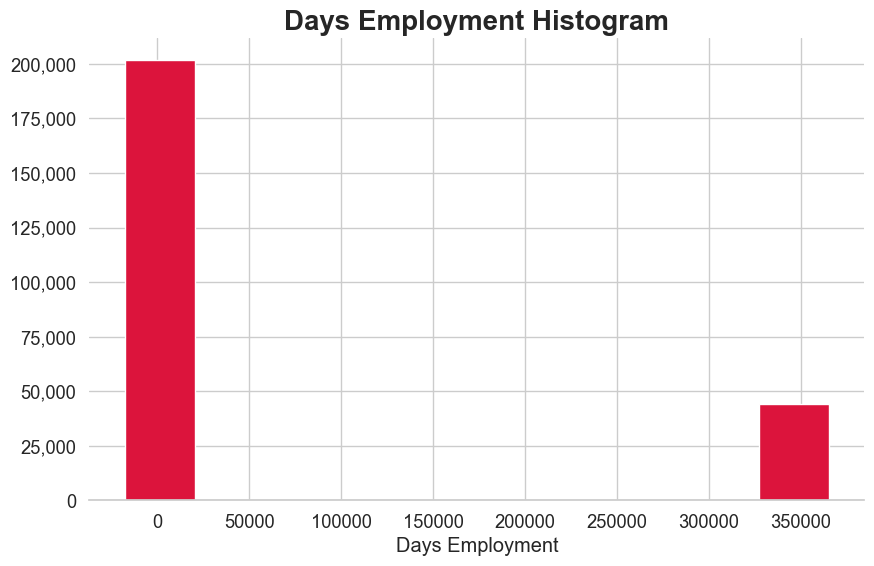

In [258]:
plot_histogram(app_train, 'DAYS_EMPLOYED', 'Days Employment Histogram', 'Days Employment')

In [259]:
# check df chứa dữ liệu ngày dị thường
include_anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
# include_anom.shape

# check df không chứa dữ liệu ngày dị thường
exclude_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
# exclude_anom.shape

print(f'There are {include_anom.shape[0]} anomalous days of employment.')

There are 44324 anomalous days of employment.


In [260]:
# replace 365243 thành null value
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

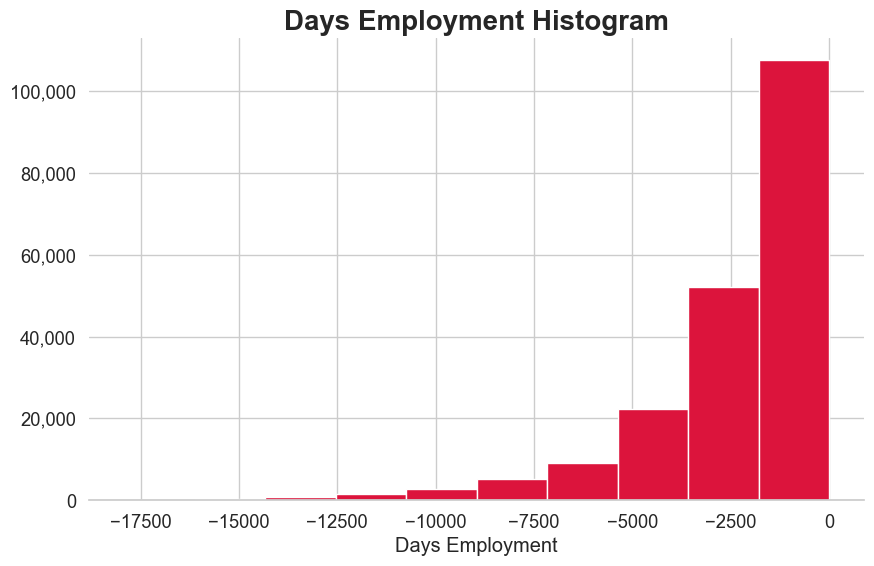

In [261]:
plot_histogram(app_train, 'DAYS_EMPLOYED', 'Days Employment Histogram', 'Days Employment')

### 5.1. NAME_CONTRACT_TYPE

Total Number of unique categories of NAME_CONTRACT_TYPE = 2


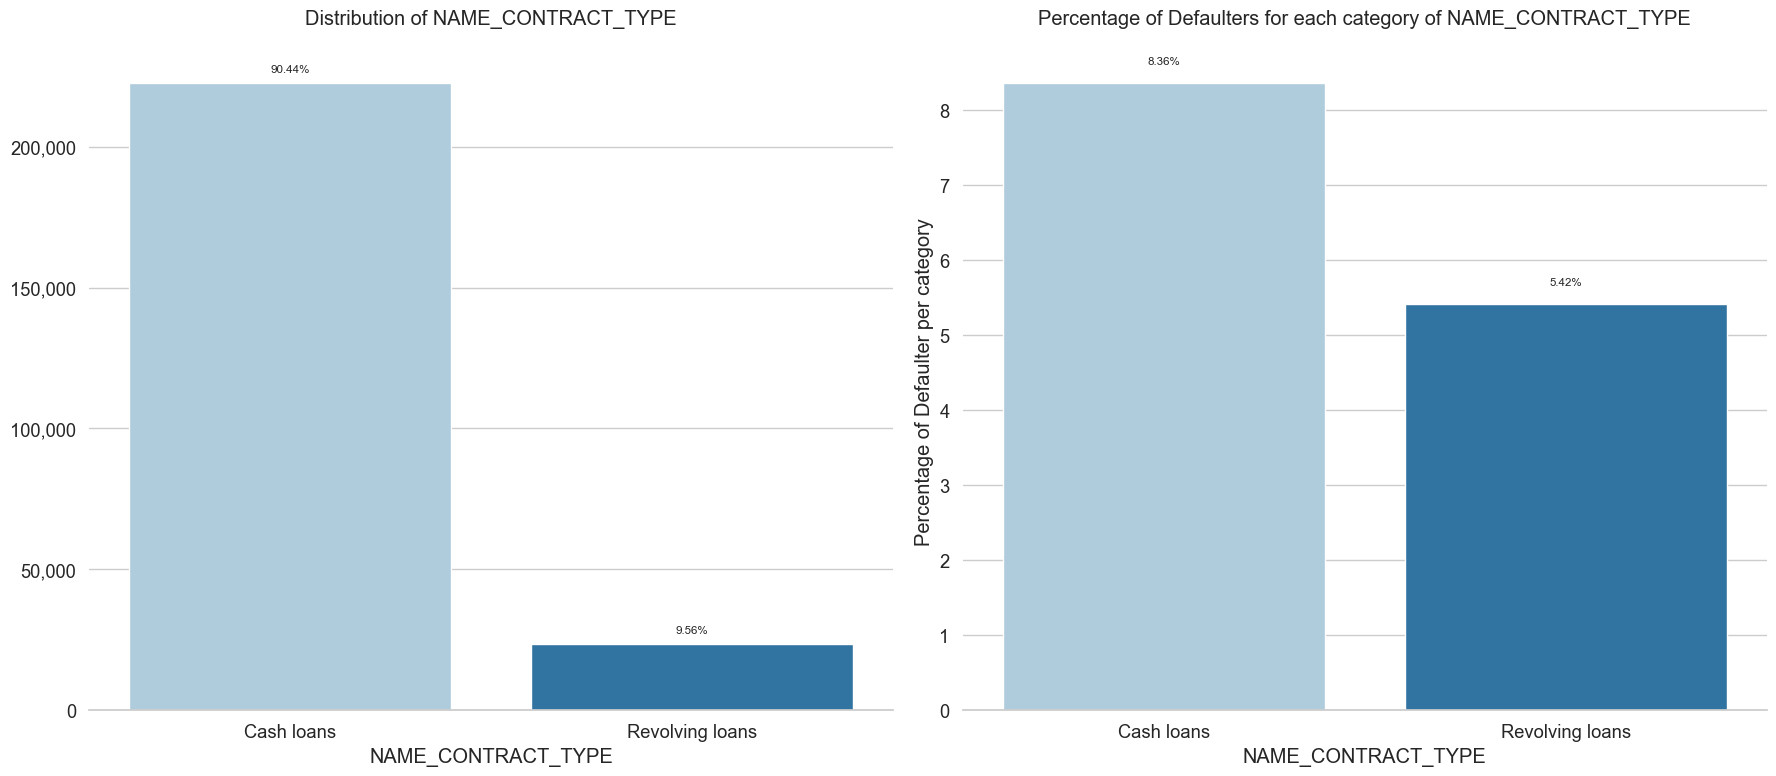

In [262]:
# calculate_perc_categories(app_train, ['NAME_CONTRACT_TYPE'], 'TARGET')
plot_categorical_bar_vertical(app_train, 'NAME_CONTRACT_TYPE')

- The number of loans in the Cash loans category is about 90.4%, accounting for the majority of all loan data in this dataset. Meanwhile, the number of loans using Revolving loans is much smaller, only about 9.6% compared to Cash loans.

- Revolving loans contract type only accounts for a small portion of the total loans. However, about 5% of customers are unable to repay the loan compared to about 8.36% of loans that are Cash loans.

##### **Note:**
- Cash loans are a type of loan in which the borrower receives a certain amount of money and pays it back in fixed installments over a predetermined period of time.

- Revolving loans are a type of loan in which the borrower is given a maximum credit limit and can withdraw part or all of the amount needed under that credit limit, with interest payments on the amount paid. Borrow and pay the minimum monthly amount.

---
### 5.2. CODE_GENDER

In [263]:
calculate_perc_categories(app_train, ['CODE_GENDER'], 'TARGET')

TARGET,0,1
CODE_GENDER,,
F,92.997479,7.002521
M,89.849079,10.150921
XNA,100.000000,0.000000


Total Number of unique categories of CODE_GENDER = 3


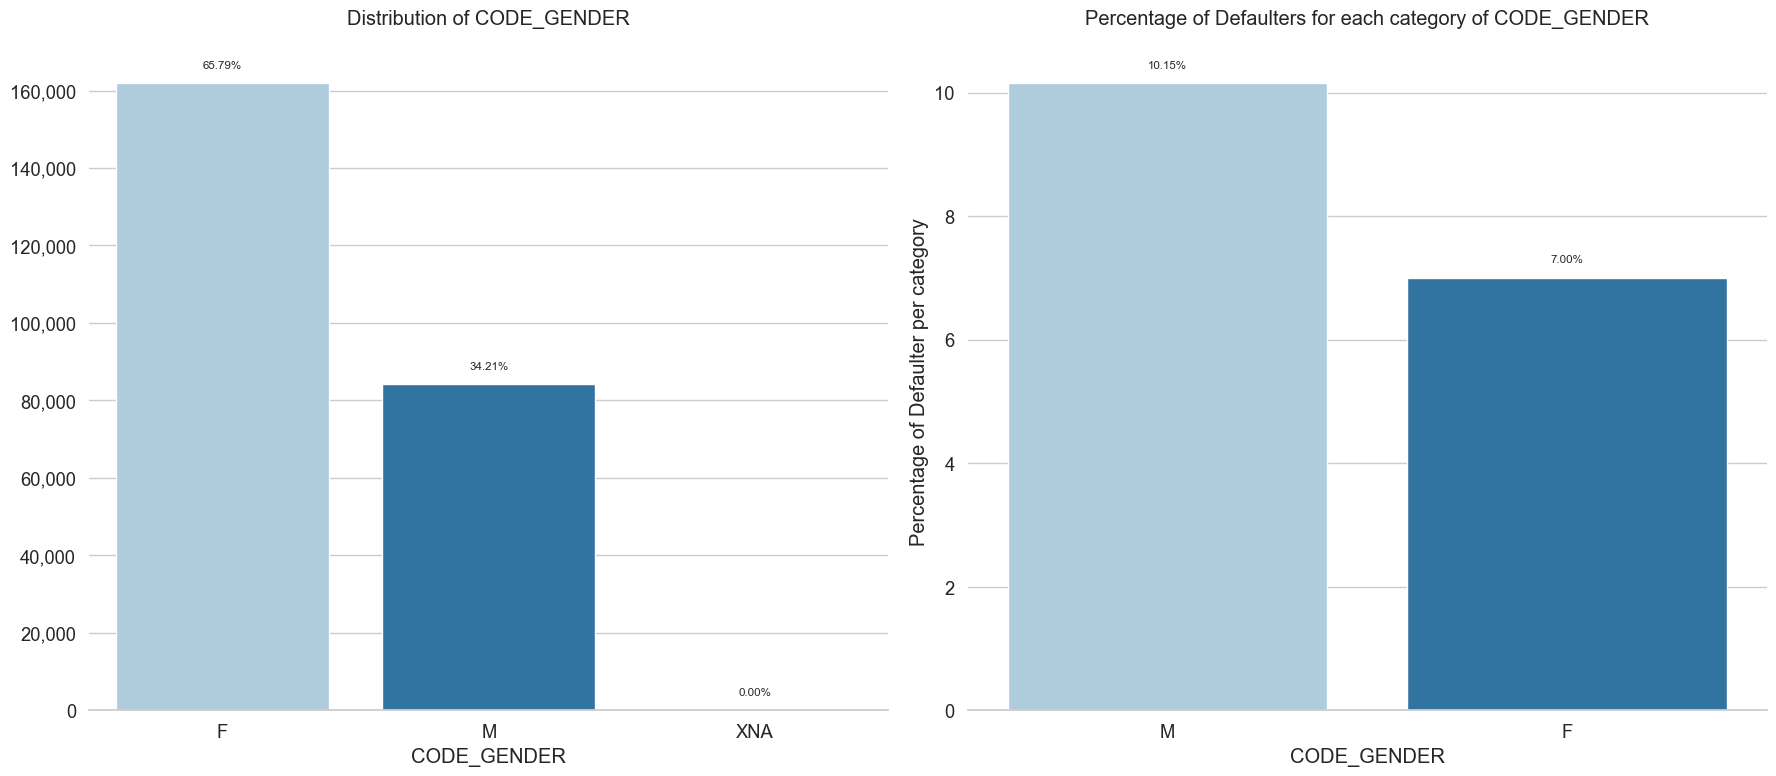

In [264]:
# print_unique_categories(app_train, 'CODE_GENDER', show_counts=True)
# calculate_perc_categories(app_train, ['CODE_GENDER'], 'TARGET')
plot_categorical_bar_vertical(app_train, 'CODE_GENDER')

##### **Who is the highest borrower? Male or Female?**
- In loan application data, women applied for the majority of loans, almost twice as often as men.

- However, the proportion of men having problems repaying debt or installments on time is higher (about 10% of the total) than women (about 7%).

---
### 5.3. FLAG ASSET

### a. FLAG_OWN_CAR

In [265]:
calculate_perc_categories(app_train, ['FLAG_OWN_CAR'], 'TARGET')

TARGET,0,1
FLAG_OWN_CAR,,
N,91.466483,8.533517
Y,92.799284,7.200716


Total Number of unique categories of FLAG_OWN_CAR = 2


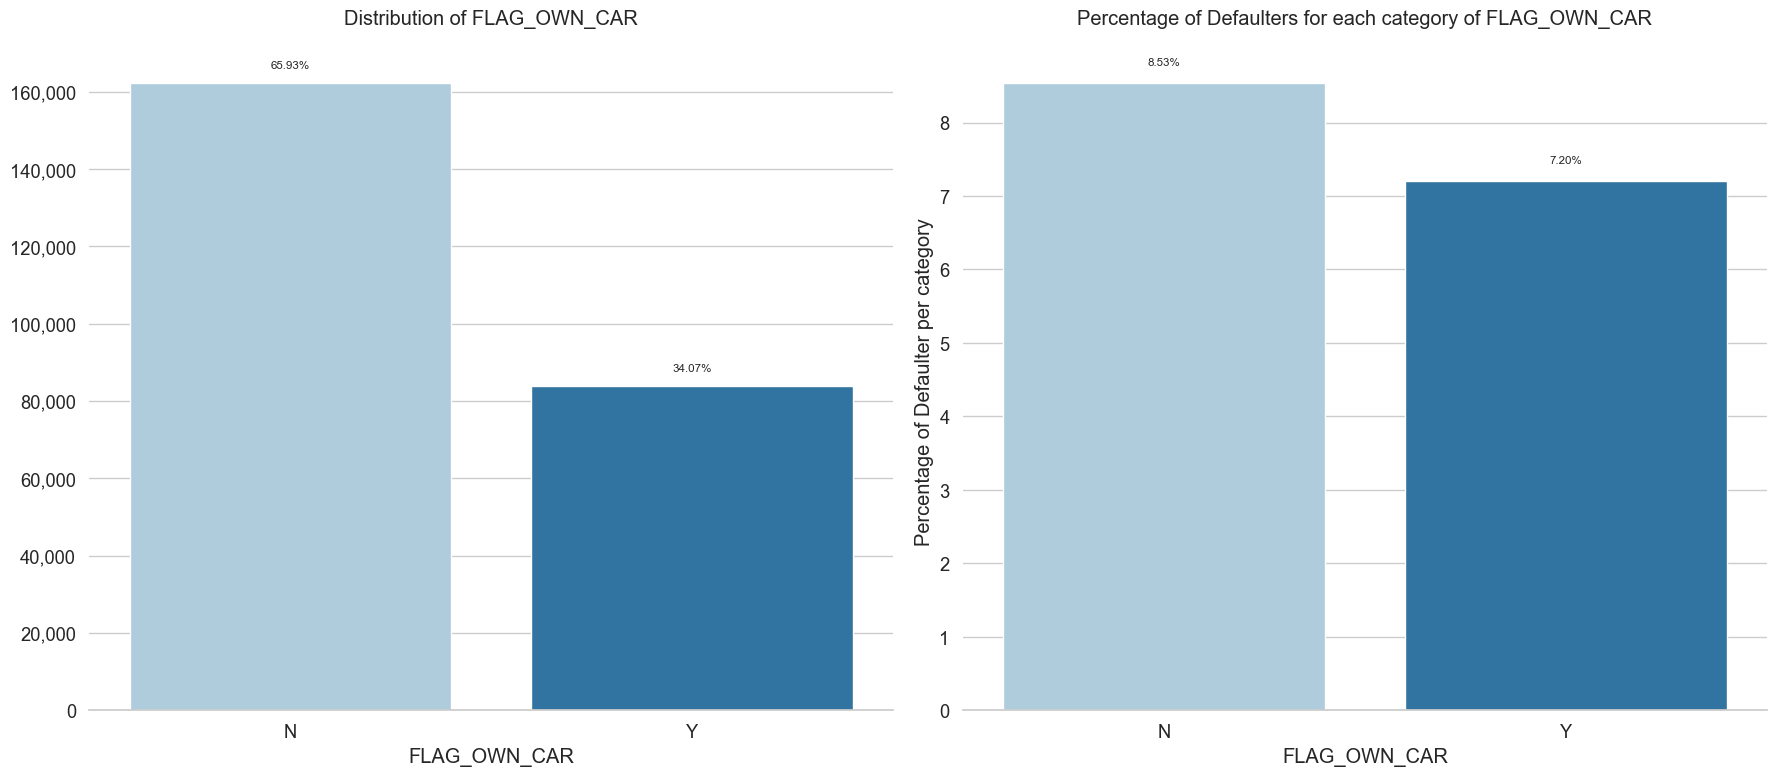

In [266]:
# print_unique_categories(app_train, 'FLAG_OWN_CAR', show_counts=True)
plot_categorical_bar_vertical(app_train, 'FLAG_OWN_CAR')

### b. FLAG_OWN_REALTY

In [267]:
calculate_perc_categories(app_train, ['FLAG_OWN_REALTY'], 'TARGET')

TARGET,0,1
FLAG_OWN_REALTY,,
N,91.634516,8.365484
Y,92.046499,7.953501


Total Number of unique categories of FLAG_OWN_REALTY = 2


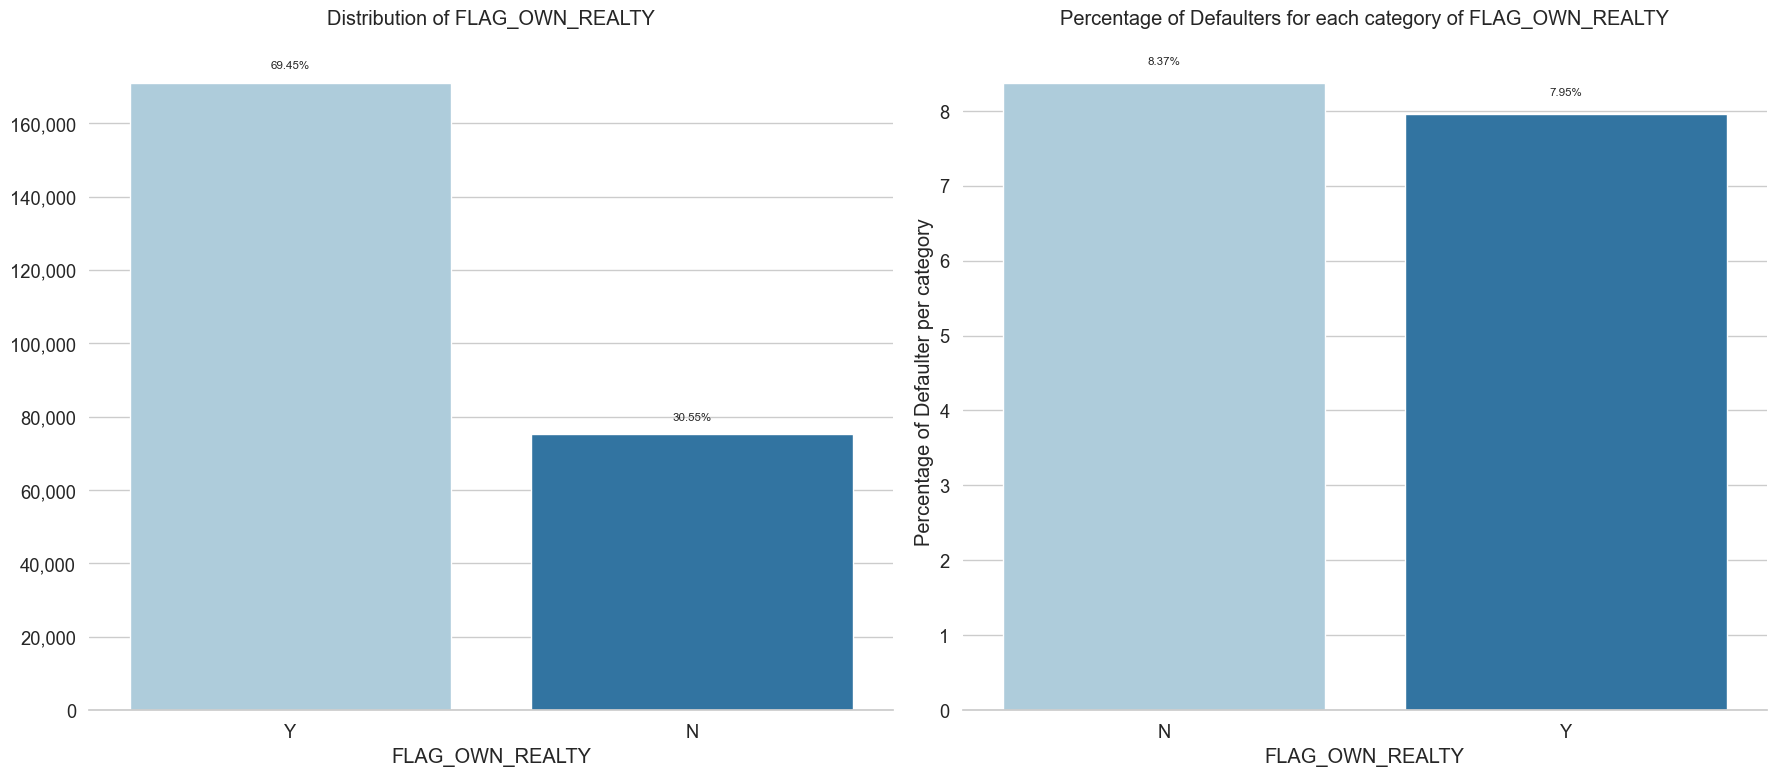

In [268]:
# calculate_perc_categories(app_train, ['FLAG_OWN_REALTY'], 'TARGET')
plot_categorical_bar_vertical(app_train, 'FLAG_OWN_REALTY')

- The number of customers who own cars accounts for nearly half of the number of customers who do not own cars. However, the proportion of customers who own a car/or do not own a car are likely to "not be able to repay the debt" is almost the same. With rates of 7.2% and 8.53% respectively

- The number of customers who own real estate is more than double the number of customers who do not own. Both types (owning real estate or not owning) also have almost the same default rate, 7.95% and 8.37% respectively.

##### **Question:**
- So what is the ability to repay the debt of a customer who owns a car and real estate/or does not own anything?

### c. FLAG_ASSET

In [269]:
def create_flag_asset(df):
    df['FLAG_ASSET'] = np.nan
    filter_0 = (df['FLAG_OWN_CAR'] == 'N') & (df['FLAG_OWN_REALTY'] == 'N')
    filter_1 = (df['FLAG_OWN_CAR'] == 'Y') & (df['FLAG_OWN_REALTY'] == 'N')
    filter_2 = (df['FLAG_OWN_CAR'] == 'N') & (df['FLAG_OWN_REALTY'] == 'Y')
    filter_3 = (df['FLAG_OWN_CAR'] == 'Y') & (df['FLAG_OWN_REALTY'] == 'Y')

    df.loc[filter_0, 'FLAG_ASSET'] = 0
    df.loc[filter_1, 'FLAG_ASSET'] = 1
    df.loc[filter_2, 'FLAG_ASSET'] = 2
    df.loc[filter_3, 'FLAG_ASSET'] = 3
    return df

In [270]:
create_flag_asset(app_train).tail()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR,FLAG_ASSET
246004,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,90253,0.0
246005,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9027,2.0
246006,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,163598,2.0
246007,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,300375,2.0
246008,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,...,0,0,0.0,0.0,0.0,2.0,0.0,1.0,258328,0.0


In [271]:
calculate_perc_categories(app_train, ['FLAG_ASSET'], 'TARGET')

TARGET,0,1
FLAG_ASSET,,
0.0,90.954591,9.045409
1.0,92.934340,7.065660
2.0,91.690374,8.309626
3.0,92.739183,7.260817


Total Number of unique categories of FLAG_ASSET = 4


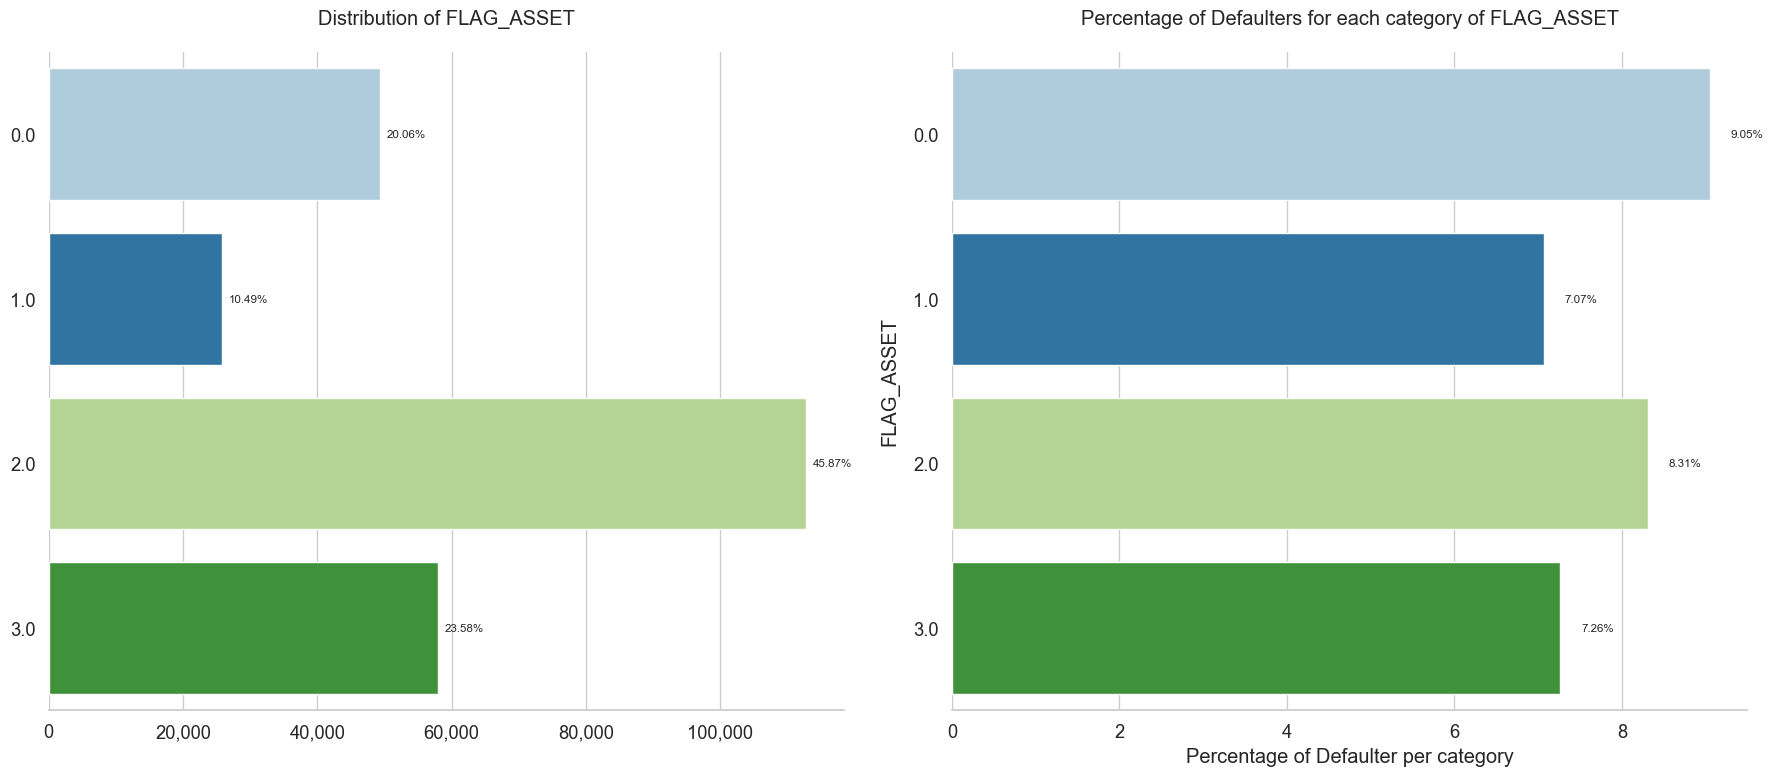

In [272]:
plot_categorical_bar_horizontal(app_train, 'FLAG_ASSET')

Can see,
- **Class 0** (does not own a car/does not own real estate) has the highest rate of not being able to repay the debt on time (this seems understandable) - 9.05%

- Following that, is **class 2** (does not own a car but owns real estate) - 8.31%
- Next is **class 3** (owning both) also has a rate of not repaying on time about 7.26%.
- Finally, **class 1** (owns a car but does not own real estate) - 7.07%

You might consider dropping the variables related to ASSET, keeping the FLAG_ASSET column.

---
### 5.4. NAME_FAMILY_STATUS

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_FAMILY_STATUS' are: 
['Married' 'Civil marriage' 'Single / not married' 'Widow' 'Separated'
 'Unknown']
----------------------------------------------------------------------------------------------------
Counts of each category are: 
NAME_FAMILY_STATUS
Married                 157320
Single / not married     36271
Civil marriage           23842
Separated                15805
Widow                    12770
Unknown                      1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_FAMILY_STATUS = 6


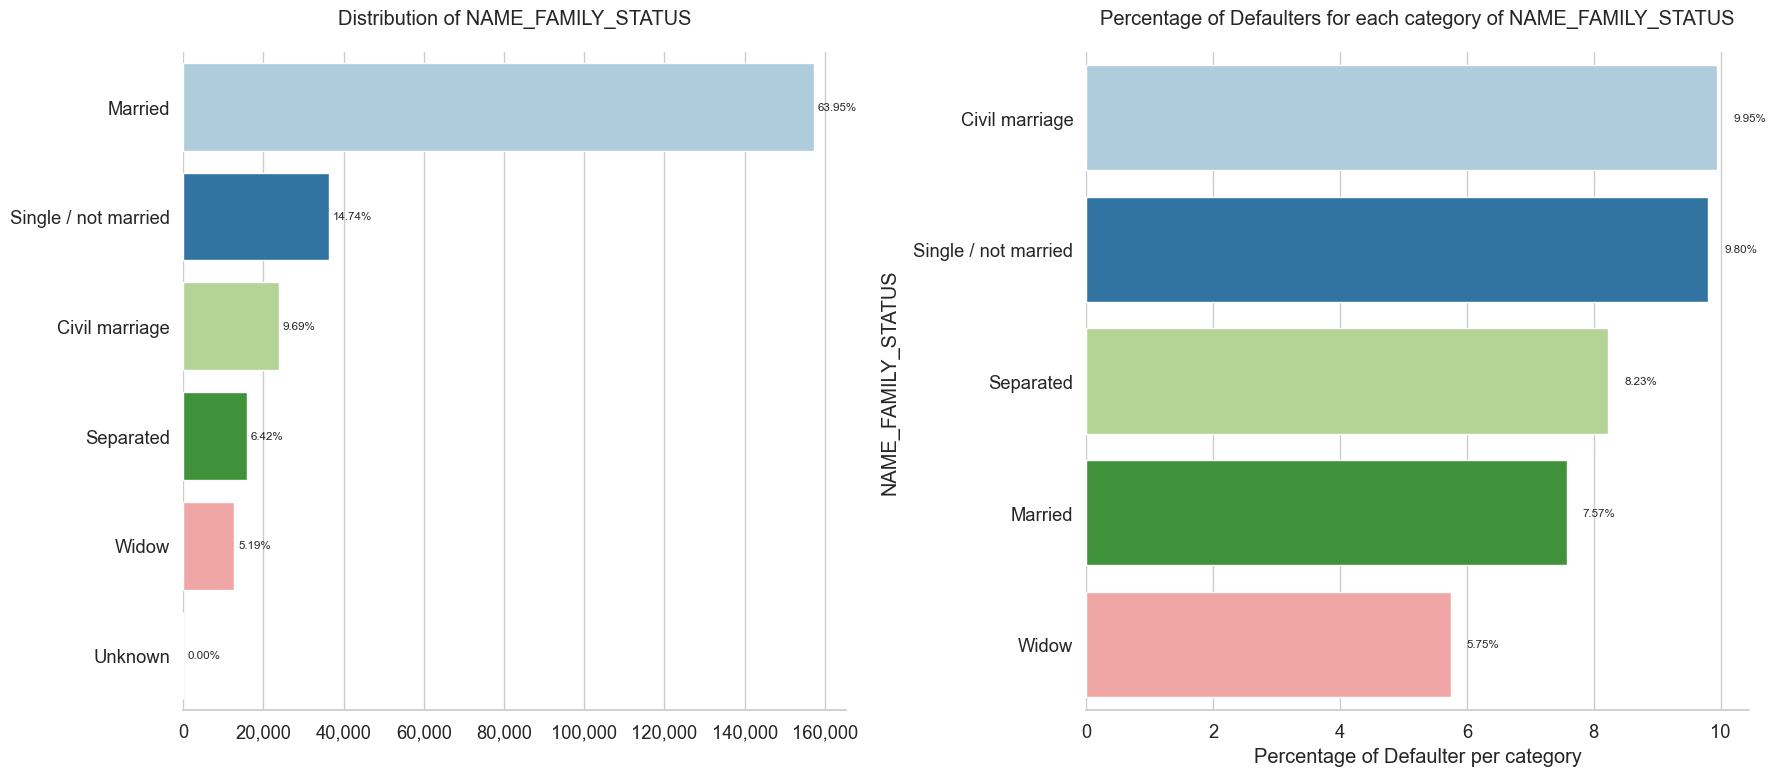

In [273]:
print_unique_categories(app_train, 'NAME_FAMILY_STATUS', show_counts=True)
# calculate_perc_categories(app_train, ['NAME_FAMILY_STATUS'], 'TARGET')
plot_categorical_bar_horizontal(app_train, 'NAME_FAMILY_STATUS')

- Most customers are married, followed by Single/Not married and Civil marriage.

- In terms of debt non-repayment rate, Civil marriage has the highest debt non-repayment rate (9.9%), followed by Single/Not married (9.8%) and the lowest is Widow (5.75%).

---
### 5.5. CNT_CHILDREN

----------------------------------------------------------------------------------------------------
The unique categories of 'CNT_CHILDREN' are: 
[ 0  1  2  3  4  7  5  6  9 11 10  8 19 14]
----------------------------------------------------------------------------------------------------
Counts of each category are: 
CNT_CHILDREN
0     172333
1      48929
2      21410
3       2911
4        327
5         64
6         19
7          5
14         3
9          2
10         2
19         2
11         1
8          1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of CNT_CHILDREN = 14


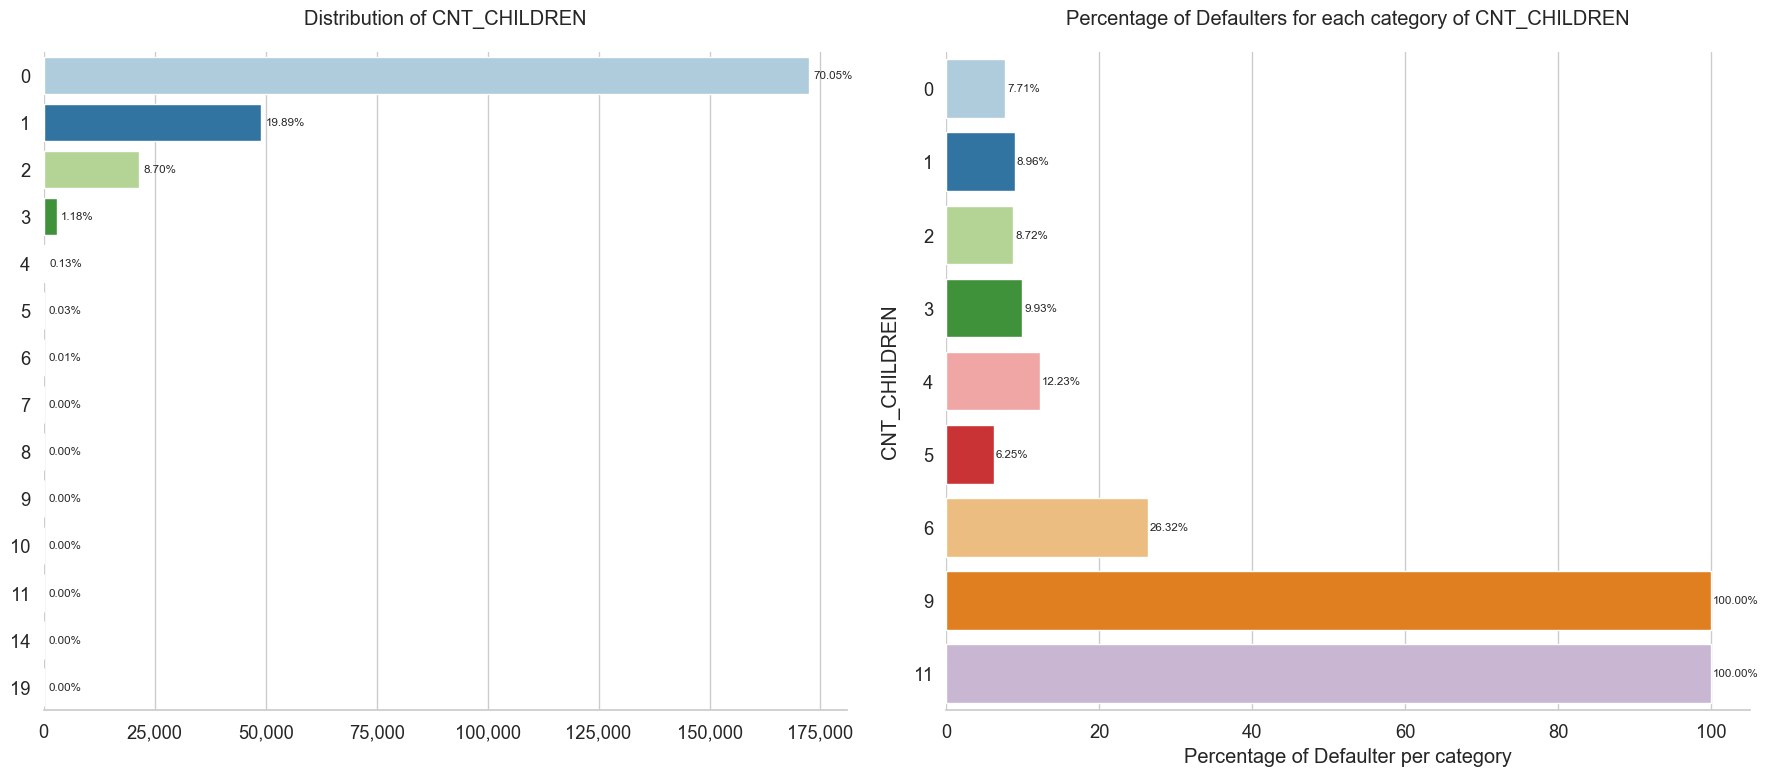

In [274]:
print_unique_categories(app_train, 'CNT_CHILDREN', show_counts=True)
plot_categorical_bar_horizontal(app_train, 'CNT_CHILDREN')

In [275]:
app_train['CNT_NON_CHILD'] = app_train['CNT_FAM_MEMBERS'] - app_train['CNT_CHILDREN']

- CNT_NON_CHILD: Calculate the number of family members who are not children.

- cnt_members['Y_N_child']: Create a new column in cnt_members. This column contains a binary value (0 or 1), determined by comparing column 'CNT_FAM_MEMBERS' with 'CNT_NON_CHILD'. If 'CNT_FAM_MEMBERS' equals 'CNT_NON_CHILD', the value is 1, otherwise it is 0.

- In other words, we are trying to find out how many members are in the customer's family? (Nuclear family, or multi-generational family, or family with many children, ...)

In [276]:
cnt_members = app_train[['NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'CNT_NON_CHILD', 'TARGET']]
cnt_members['Y_N_child'] = (cnt_members['CNT_FAM_MEMBERS'] == cnt_members['CNT_NON_CHILD']).astype(int)
cnt_members.tail()

,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,CNT_CHILDREN,CNT_NON_CHILD,TARGET,Y_N_child
246004,Separated,1.0,0,1.0,0,1
246005,Widow,1.0,0,1.0,0,1
246006,Separated,1.0,0,1.0,0,1
246007,Married,2.0,0,2.0,1,1
246008,Married,2.0,0,2.0,0,1


Total Number of unique categories of Y_N_child = 2


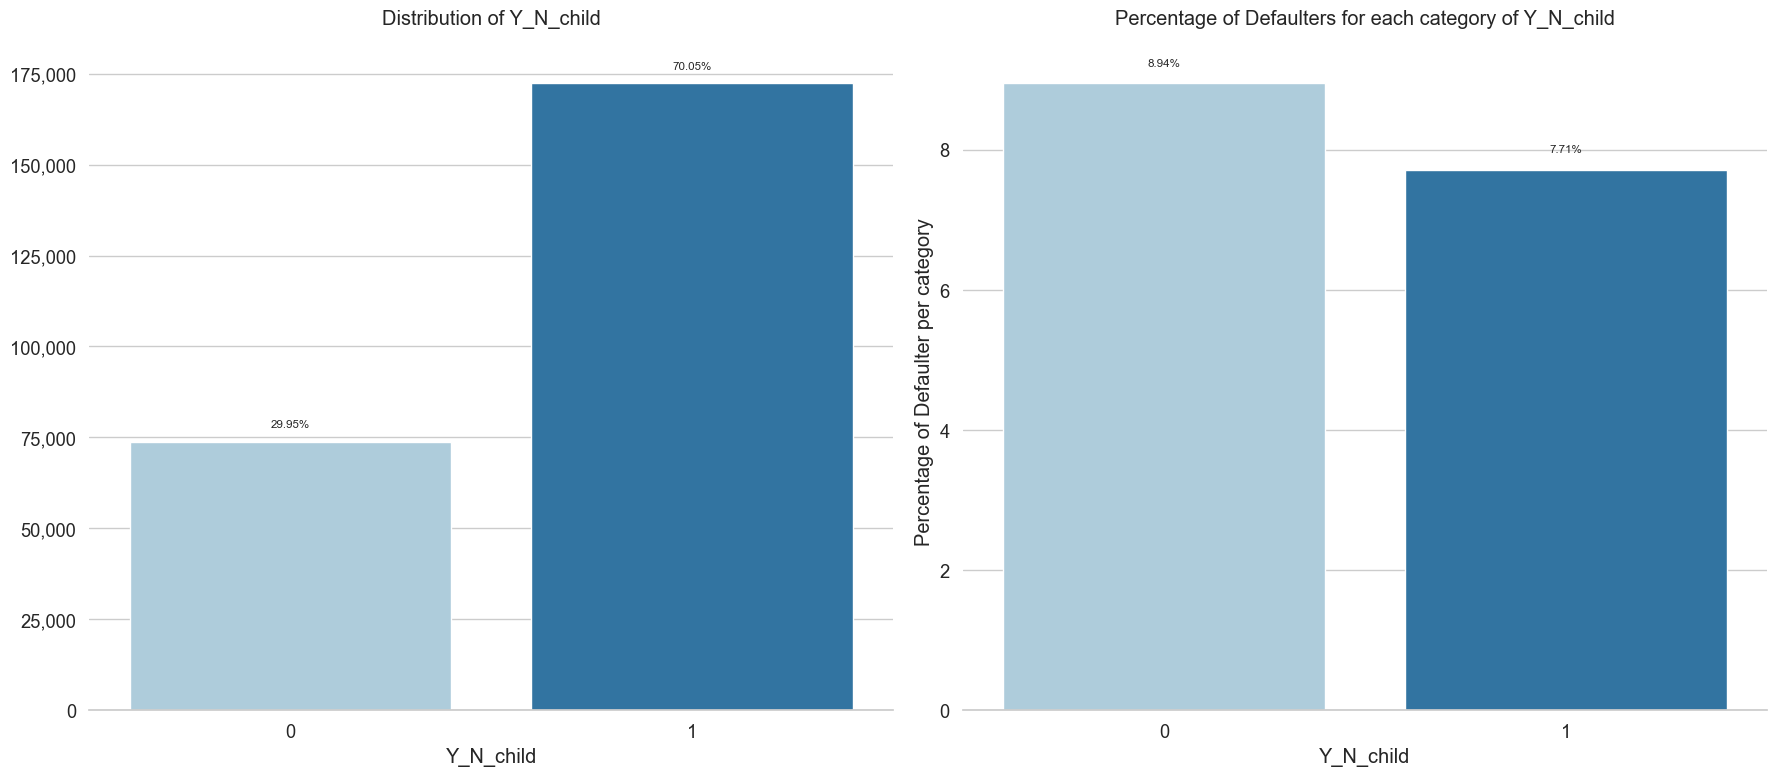

In [277]:
plot_categorical_bar_vertical(cnt_members, 'Y_N_child')

- Nhìn chung, phần lớn người đăng ký vay là gia đình không có trẻ con (chiếm khoảng 70%), trong khi những gia đình có 1-2 trẻ em trở lên chiếm một tỷ lệ nhỏ hơn (khoảng 29.9%).

- Tuy nhiên, gia đình có trẻ em hoặc con cái lại có tỷ lệ vỡ nợ cao hơn (8.94%) so với những gia đình chỉ có 2 người lớn (7.71%).

- Điều này, có thể dễ hiểu vì gia đình có trẻ em có thể đối mặt với các chi phí và trách nhiệm tài chính khác nhau so với gia đình không có trẻ em.

- In general, the majority of loan applicants are families without children (about 70%), while families with 1-2 children or more account for a smaller proportion (about 29.9%).

- However, families with children or children have a higher default rate (8.94%) than families with only 2 adults (7.71%).

- This is understandable because families with children may face different costs and financial responsibilities than families without children.

---
### 5.6. CNT_FAM_MEMBERS

----------------------------------------------------------------------------------------------------
The unique categories of 'CNT_FAM_MEMBERS' are: 
[ 2.  1.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 12. 20. 15. 16. 11.]
----------------------------------------------------------------------------------------------------
Counts of each category are: 
CNT_FAM_MEMBERS
2.0     126956
1.0      54069
3.0      42092
4.0      19752
5.0       2733
6.0        310
7.0         63
8.0         18
9.0          4
10.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of CNT_FAM_MEMBERS = 17


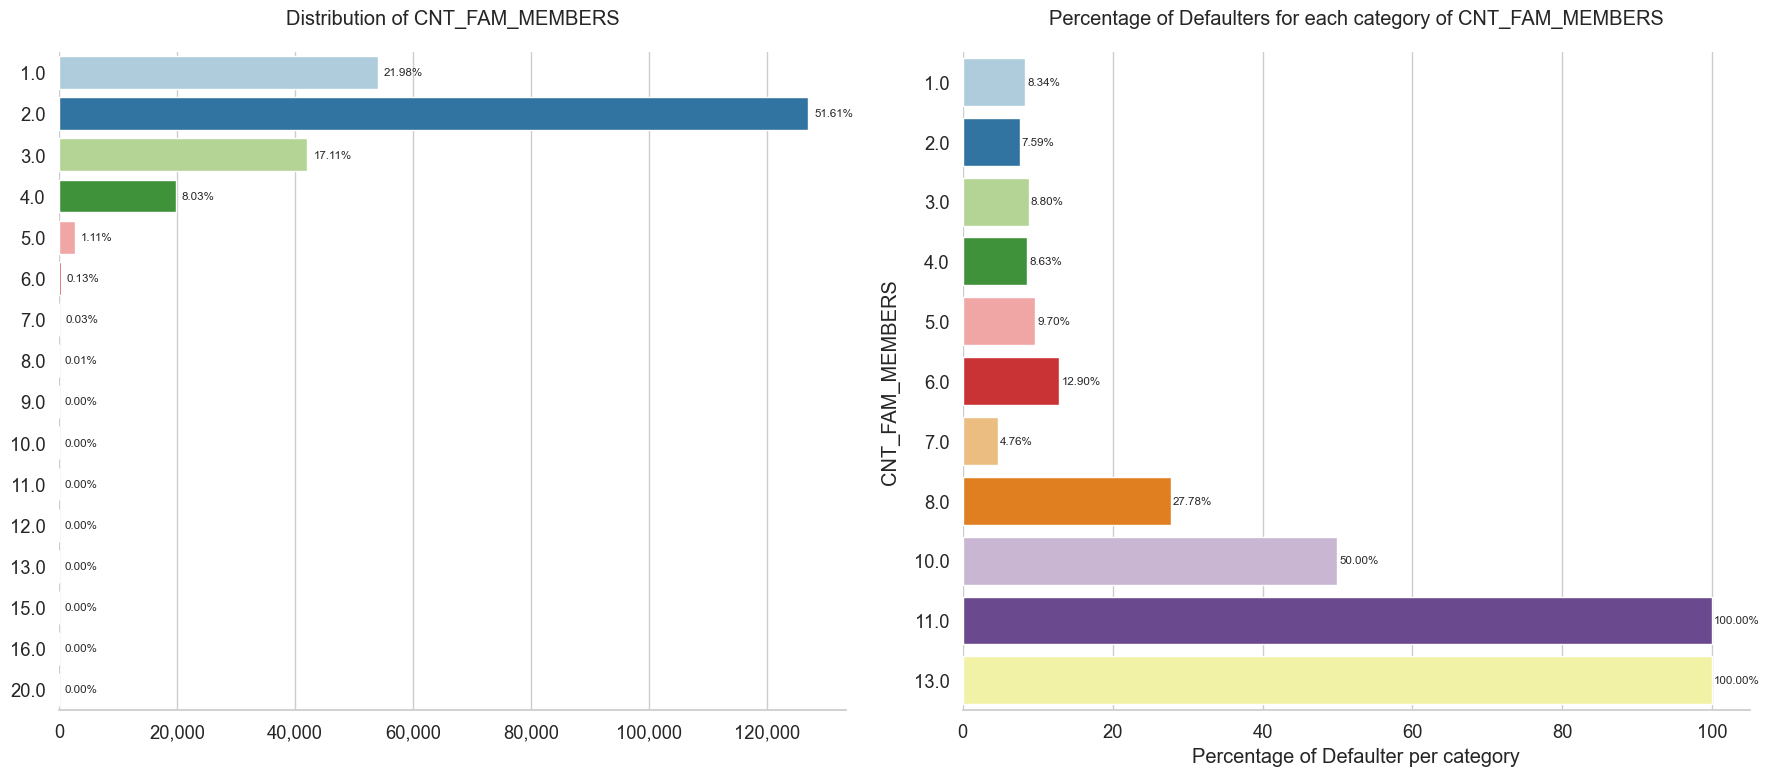

In [278]:
print_unique_categories(app_train, 'CNT_FAM_MEMBERS', show_counts=True)
plot_categorical_bar_horizontal(app_train, 'CNT_FAM_MEMBERS')

---
### 5.7. NAME_INCOME_TYPE

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_INCOME_TYPE' are: 
['State servant' 'Working' 'Pensioner' 'Commercial associate' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
----------------------------------------------------------------------------------------------------
Counts of each category are: 
NAME_INCOME_TYPE
Working                 126930
Commercial associate     57339
Pensioner                44314
State servant            17381
Unemployed                  19
Student                     15
Businessman                  9
Maternity leave              2
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_INCOME_TYPE = 8


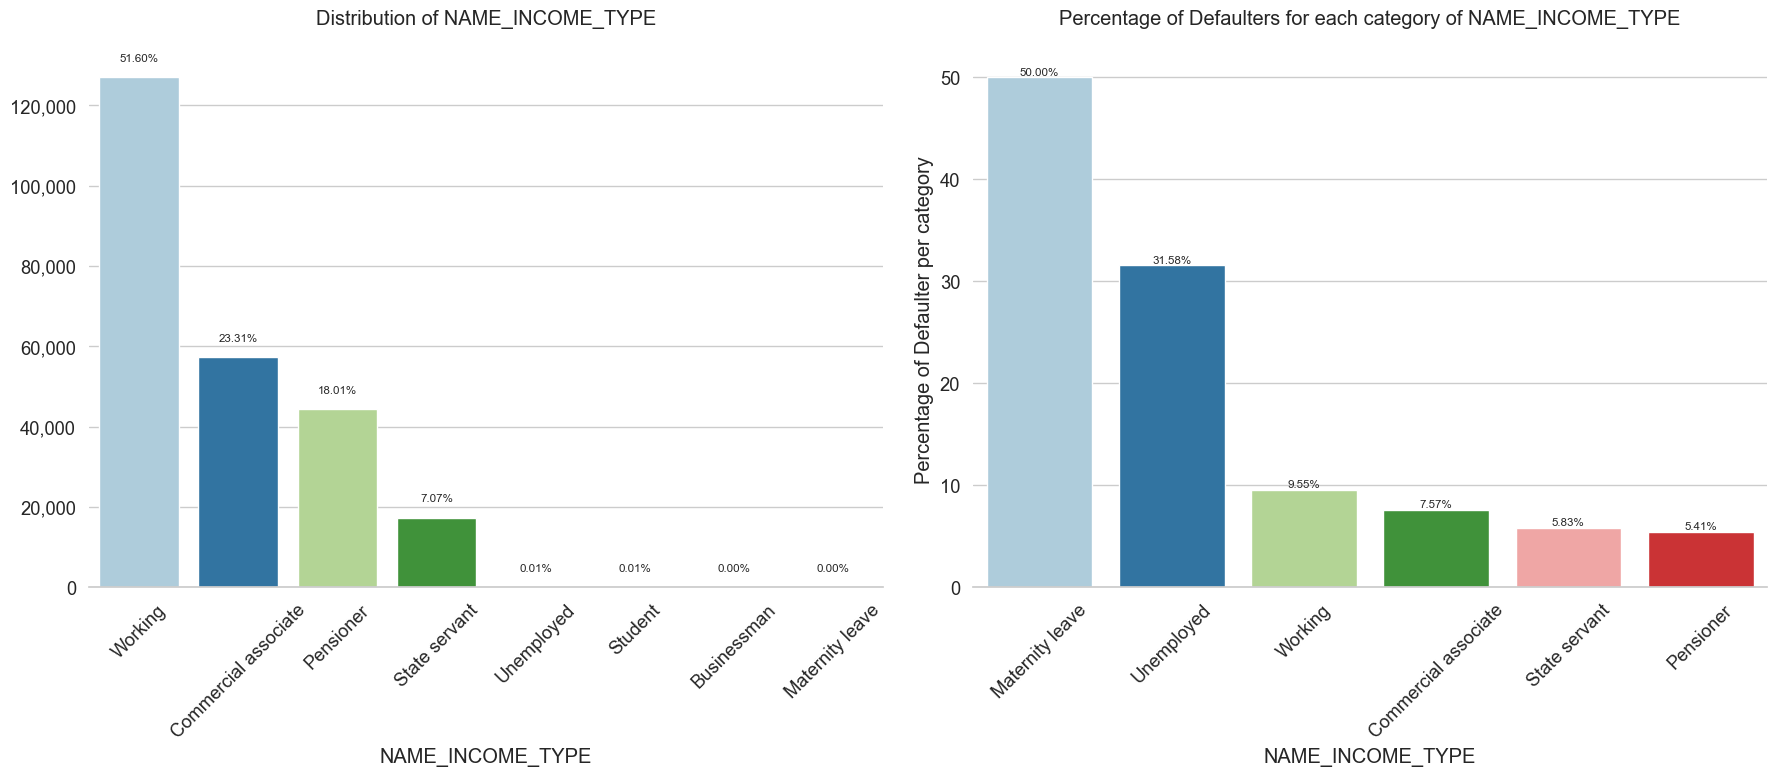

In [279]:
print_unique_categories(app_train, 'NAME_INCOME_TYPE', show_counts=True)
plot_categorical_bar_vertical(app_train, 'NAME_INCOME_TYPE', rotation=45)

In [280]:
calculate_perc_categories(app_train, ['NAME_INCOME_TYPE'], 'TARGET')

TARGET,0,1
NAME_INCOME_TYPE,,
Businessman,100.000000,0.000000
Commercial associate,92.432725,7.567275
Maternity leave,50.000000,50.000000
Pensioner,94.588618,5.411382
State servant,94.166043,5.833957
Student,100.000000,0.000000
Unemployed,68.421053,31.578947
Working,90.453006,9.546994


- Most of the loan applicants' income came from Working (51.6%), followed by Commercial associate (23.31%), Pensioner (18.01%) and State servant (7.07%).

- Although applicants with low Maternity Leave income category (2 customers), the loan non-repayment rate is 50%. That means of 2 borrowers, 1 of them cannot repay this loan.

- Next is unemployed customers with a rate of 31.58%. The remaining types of income are below the average of 10%.

- In addition, Students and Businessmen have a number of loan applications (15 and 9 applications, respectively), only accounting for a very small proportion (0.006% and 0.003%, respectively) of the total number of loan applications. However, both types of customers have the ability to repay 100%.

---
### 5.8. OCUPATION OF CLIENT

Total Number of unique categories of OCCUPATION_TYPE = 19


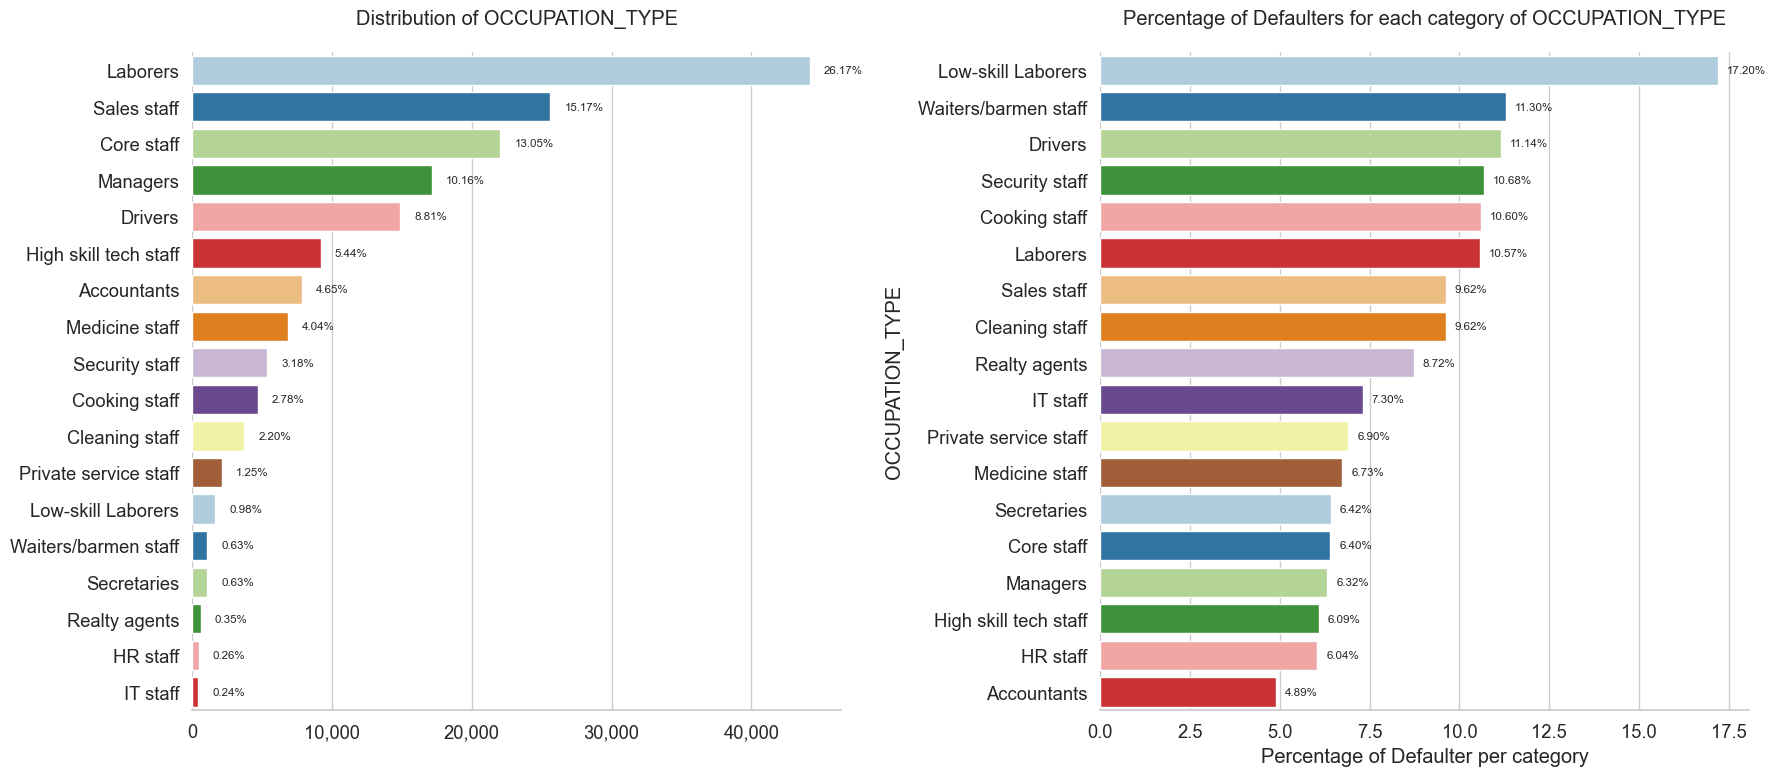

In [281]:
plot_categorical_bar_horizontal(app_train, 'OCCUPATION_TYPE')

- Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.

- The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

---
### 5.9. ORGANIZATION_TYPE

Total Number of categories of ORGANIZATION_TYPE = 58


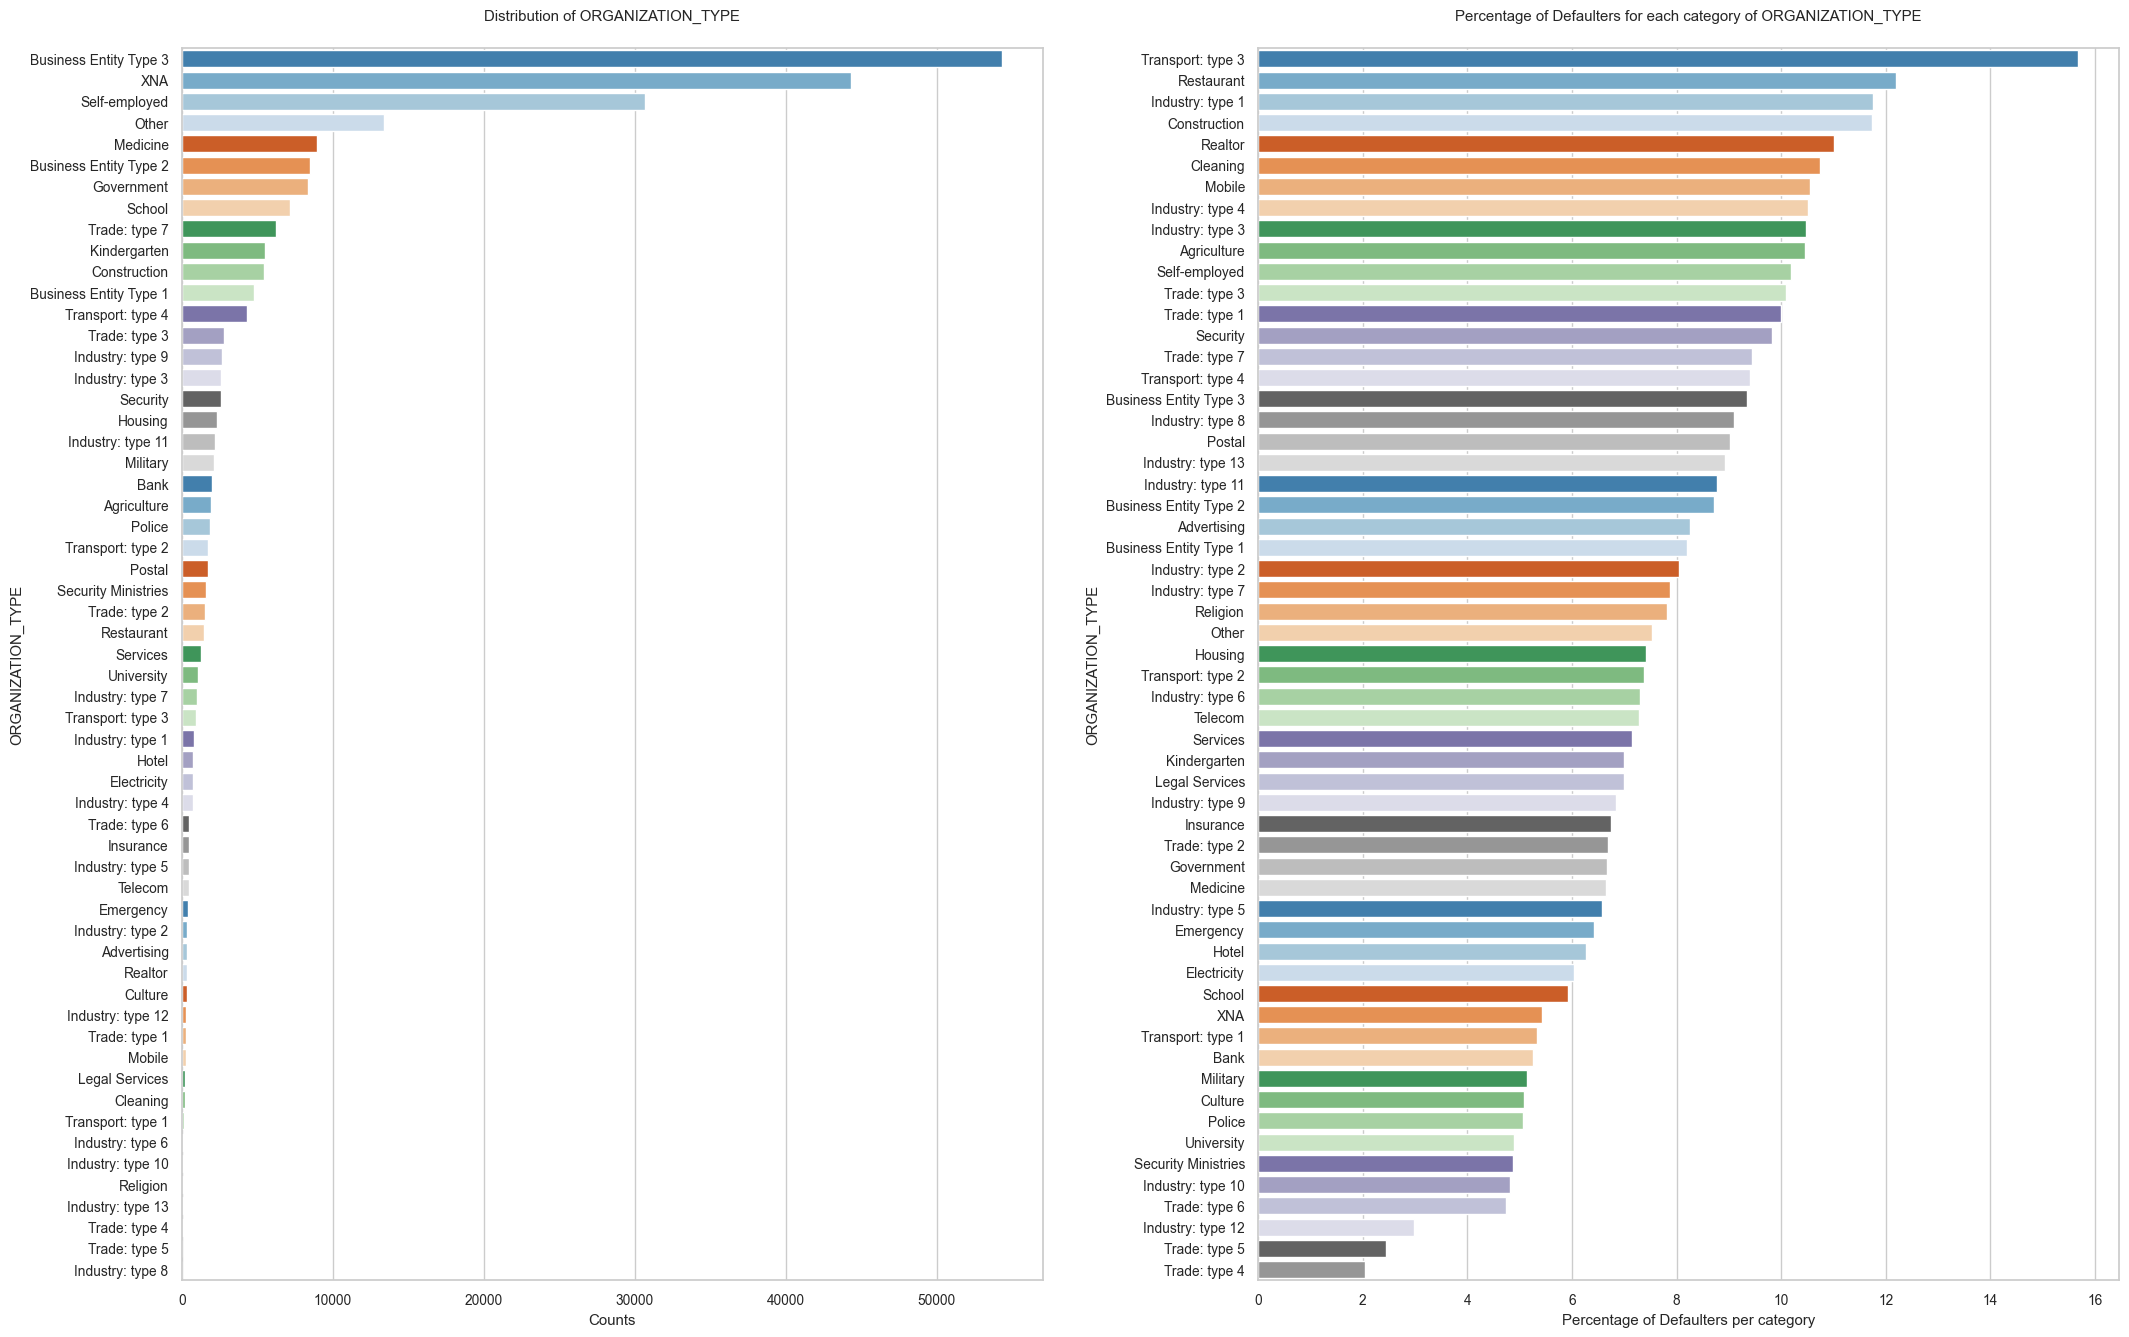

In [282]:
print(f"Total Number of categories of ORGANIZATION_TYPE = {len(app_train.ORGANIZATION_TYPE.unique())}")

plt.figure(figsize = (25, 16))
sns.set(style = 'whitegrid', font_scale = 0.9)
plt.subplots_adjust(wspace=0.25)

plt.subplot(1, 2, 1)
count_organization = app_train.ORGANIZATION_TYPE.value_counts().sort_values(ascending = False)
sns.barplot(x = count_organization, y = count_organization.index, palette=sns.color_palette('tab20c'))
plt.title('Distribution of ORGANIZATION_TYPE', pad = 20)
plt.xlabel('Counts')
plt.ylabel('ORGANIZATION_TYPE')

plt.subplot(1,2,2)
percentage_default_per_organization = app_train[app_train.TARGET == 1].ORGANIZATION_TYPE.value_counts() * 100 / count_organization
percentage_default_per_organization = percentage_default_per_organization.dropna().sort_values(ascending = False)
sns.barplot(x = percentage_default_per_organization, y = percentage_default_per_organization.index, palette=sns.color_palette('tab20c'))
plt.title('Percentage of Defaulters for each category of ORGANIZATION_TYPE', pad = 20)
plt.xlabel('Percentage of Defaulters per category')
plt.ylabel('ORGANIZATION_TYPE')

plt.show()

- There are a lots of organization types which the client belongs to, 58 to be precise. The plots above give the following observations:

- From the first plot we see that most of the applicants work in Organizations of Type 'Business Entity Type3', 'XNA' or 'Self Employed'. The Organization Type 'XNA' could probably denote unclassified Organization Type.

- From the second plot, we notice that the applicants belonging to 'Transport: type 3' have the highest defaulting tendency as compared to the rest. They are followed by organizations of types: 'Restaurant', 'Industry: type 1', 'Construction', etc.

- The organizations which show lowest default rates are 'Trade: type 4', 'Industry: type 5', etc.

---
### 5.10. EDUCATION TYPE

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_EDUCATION_TYPE' are: 
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
----------------------------------------------------------------------------------------------------
Counts of each category are: 
NAME_EDUCATION_TYPE
Secondary / secondary special    174522
Higher education                  60061
Incomplete higher                  8211
Lower secondary                    3085
Academic degree                     130
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_EDUCATION_TYPE = 5


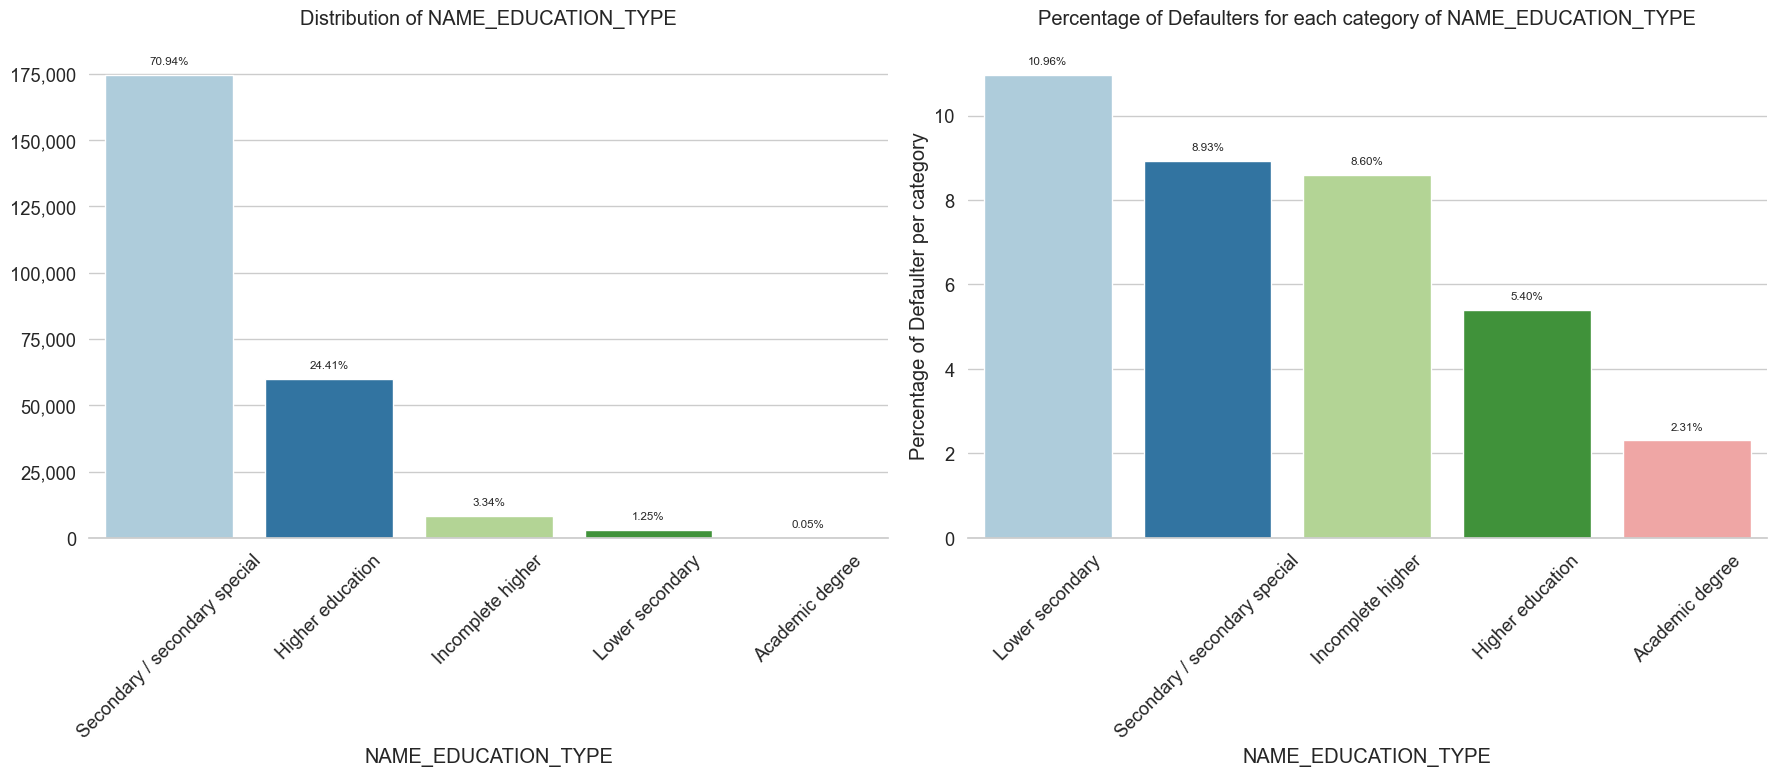

In [283]:
print_unique_categories(app_train, 'NAME_EDUCATION_TYPE', show_counts=True)
# calculate_perc_categories(app_train, ['NAME_EDUCATION_TYPE'], 'TARGET')
plot_categorical_bar_vertical(app_train, 'NAME_EDUCATION_TYPE', rotation=45)

- The majority of customers (70.94%) currently borrowing have an education level at Secondary/Secondary special, followed by those at the Higher education level (24.41%), and this rate is lowest for customers who own Academic degree (only 0.05%).

- Although the number of loan applications from customers at the Lower Secondary level is small (1.25%), they have the highest default rate (10.96%). Next are customers at the Secondary/Secondary special level with a default rate of 8.93%.

---
### 5.11. NAME_HOUSING_TYPE

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_HOUSING_TYPE' are: 
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
----------------------------------------------------------------------------------------------------
Counts of each category are: 
NAME_HOUSING_TYPE
House / apartment      218389
With parents            11838
Municipal apartment      8866
Rented apartment         3916
Office apartment         2093
Co-op apartment           907
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_HOUSING_TYPE = 6


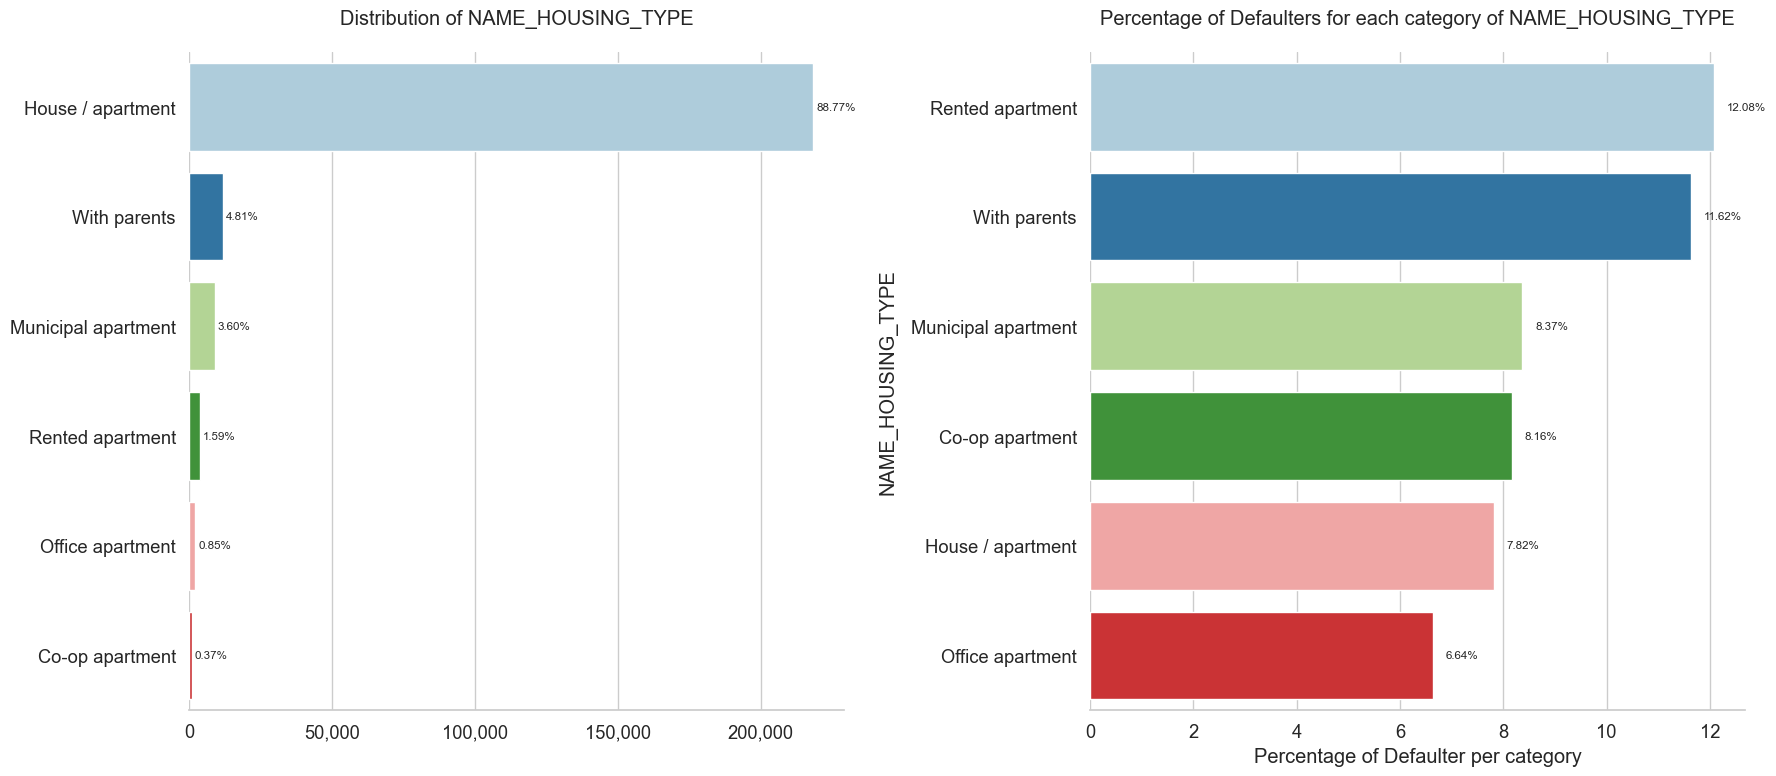

In [284]:
print_unique_categories(app_train, 'NAME_HOUSING_TYPE', show_counts=True)
plot_categorical_bar_horizontal(app_train, 'NAME_HOUSING_TYPE')

- House/apartment is the most popular type of accommodation, with the majority of customers (with more than 218,000 customers). This may reflect reality as most people usually choose to live in their own house or apartment.

- Other types of accommodation such as With parents, Municipal apartment, Rented apartment, Office apartment and Co-op apartment all have a much lower number of customers than the main types of accommodation such as House/apartment.

- Although Rented apartment and With parents (only account for 1.59%, 4.81% respectively) of the total number of loan applications, the possibility of not being able to repay the debt accounts for 12.08% and 11.62% - the highest default rate among all types of customer accommodation mentioned above.

---
### 5.12. NUMERICAL COLUMNS
||Columns|
|-|--|
|1. |AMT_INCOME_TOTAL|
|2. |AMT_CREDIT|
|3. |AMT_ANNUITY|
|4. |AMT_GOODS_PRICE|

In [285]:
def plot_distribution_comp(var,nrow=2):
    """So sánh 2 biểu đổ theo target=1 và target=0 của feature"""
    i = 0
    t1 = app_train.loc[app_train['TARGET'] != 0]
    t0 = app_train.loc[app_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(16,7*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.legend()
        plt.tick_params(axis='both', which='major', labelsize=12)

In [286]:
def plot_b_distribution(var, color, nrow=2):
    """Distribution của tổng thể feature"""
    i = 0
    fig, ax = plt.subplots(nrow,2,figsize=(16,7*nrow))

    for feature in var:
        i = i + 1
        plt.subplot(nrow,2,i)
        plt.title("Distribution of %s" % feature)
        sns.distplot(app_train[feature],color=color[i], kde=True,bins=100)

In [287]:
uni_features = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_GOODS_PRICE", "AMT_ANNUITY"]
colors = ['r', 'purple', 'orange', 'olive', 'm']

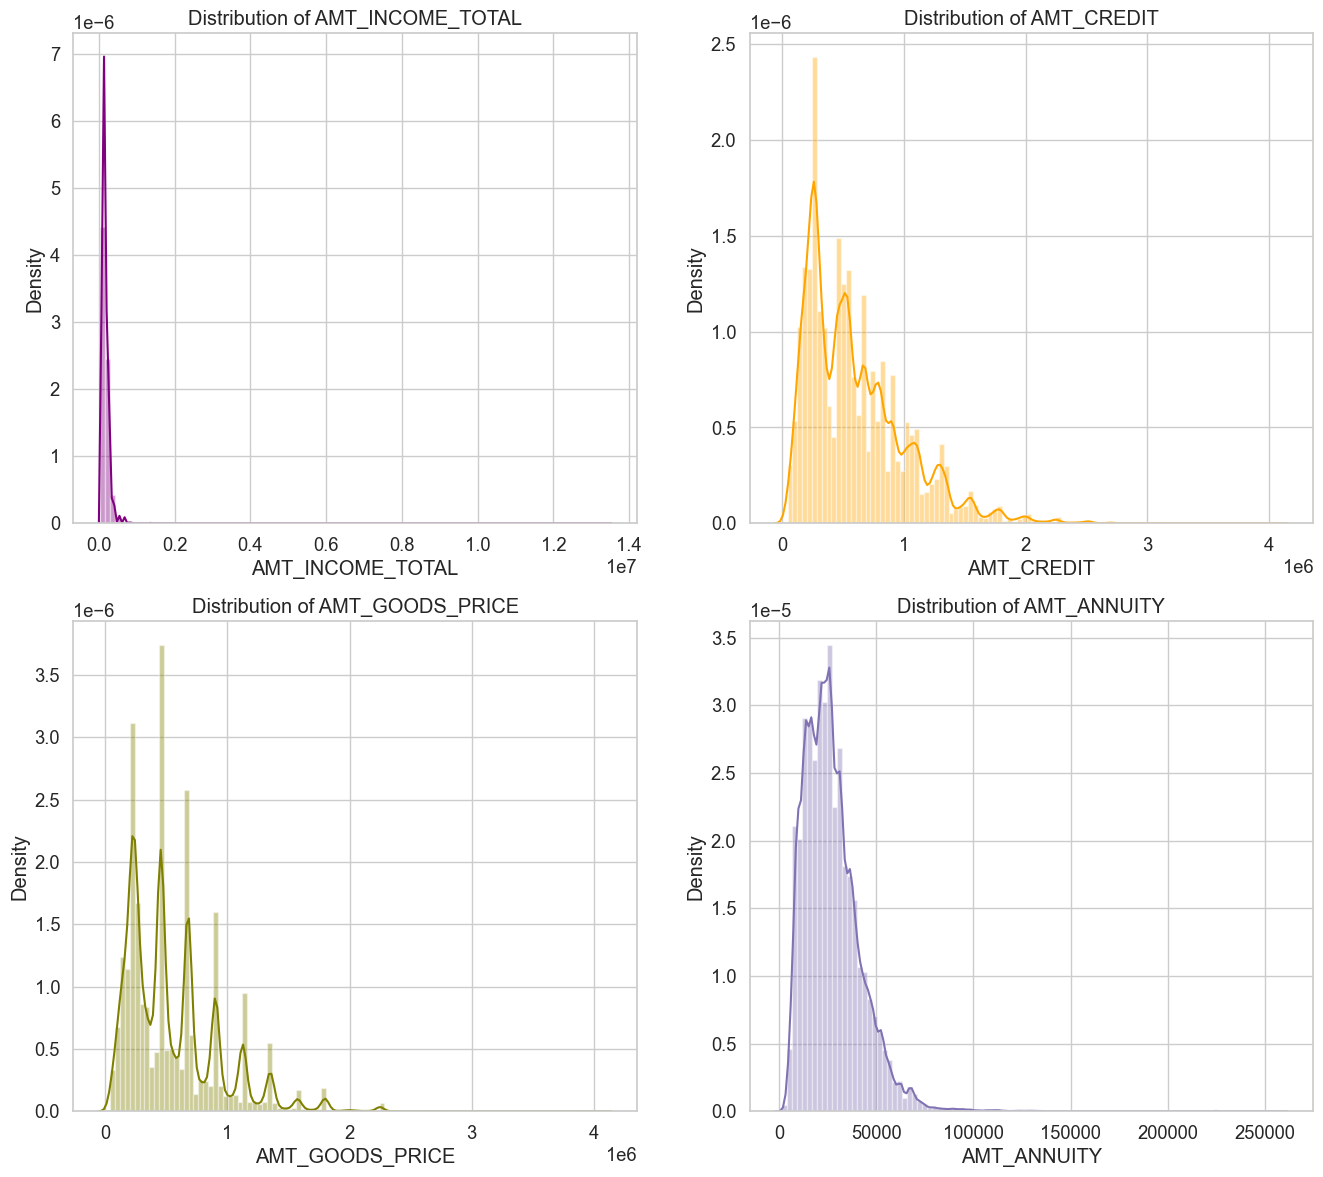

In [288]:
# Distribution của các features trong list uni_features
plot_b_distribution(uni_features, colors)

---
### 5.13. DAYS_BIRTH

In [289]:
age_bin = app_train[['TARGET', 'DAYS_BIRTH']]
age_bin['YEAR_OLD'] = -app_train['DAYS_BIRTH']/365

In [290]:
age_bin['YEAR_OLD'].describe()

count    246009.000000
mean         43.942319
std          11.948673
min          20.517808
25%          34.021918
50%          43.164384
75%          53.923288
max          69.120548
Name: YEAR_OLD, dtype: float64

- DAYS_BIRTH is a continuous variable with a range from 20 - 70.

- The horizontal axis represents age in days, negative values represent the number of days difference from the time of birth compared to the present.

In [291]:
# Phân chia khoảng tuổi thanh 10 khoảng bằng nhau
age_bin['DAYS_BIN'] = pd.cut(age_bin['YEAR_OLD'], bins = np.linspace(20, 70, num = 11))
age_bin.head()

,TARGET,DAYS_BIRTH,YEAR_OLD,DAYS_BIN
0,0,-16765,45.931507,"(45.0, 50.0]"
1,0,-19005,52.068493,"(50.0, 55.0]"
2,0,-19932,54.608219,"(50.0, 55.0]"
3,0,-16941,46.413699,"(45.0, 50.0]"
4,0,-18850,51.643836,"(50.0, 55.0]"


In [292]:
# Thống kê số lượng không trả nợ theo các khoảng tuổi.
age_bin.groupby(['DAYS_BIN']).mean()

,TARGET,DAYS_BIRTH,YEAR_OLD
DAYS_BIN,,,
"(20.0, 25.0]",0.124009,-8532.664917,23.377164
"(25.0, 30.0]",0.111557,-10155.047837,27.822049
"(30.0, 35.0]",0.102045,-11853.509209,32.475368
"(35.0, 40.0]",0.088879,-13708.826719,37.558429
"(40.0, 45.0]",0.078780,-15497.591047,42.459154
"(45.0, 50.0]",0.075446,-17323.275616,47.461029
"(50.0, 55.0]",0.066702,-19197.510778,52.595920
"(55.0, 60.0]",0.055748,-20984.759016,57.492490
"(60.0, 65.0]",0.052246,-22776.998947,62.402737


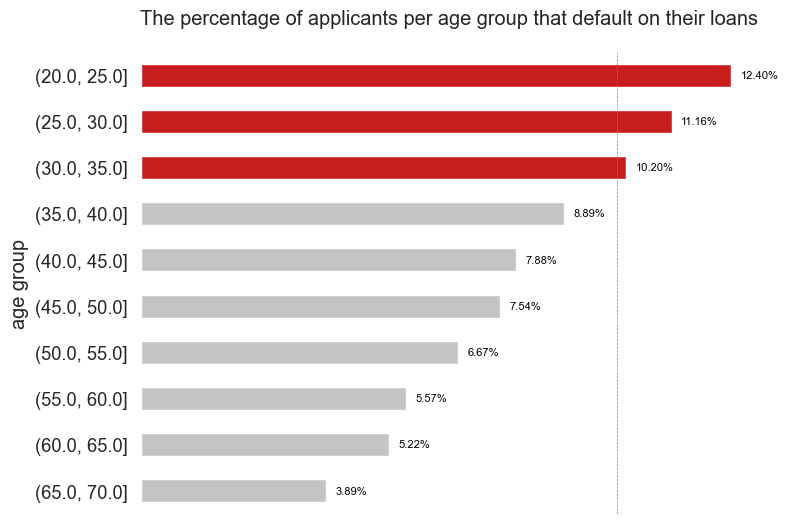

In [293]:
fig, ax = plt.subplots(figsize=(8, 6))

# Sắp xếp dữ liệu từ thấp đến cao
sorted_data = age_bin.groupby(['DAYS_BIN']).mean()['TARGET'].sort_values()

# Tạo mảng màu với màu tùy chỉnh cho 3 thanh đầu tiên
colors = ['#c4c4c4' if idx < 7 else '#c71e1d' for idx, val in enumerate(sorted_data.index)]

# Vẽ đồ thị thanh ngang
sorted_data.plot(kind='barh', color=colors, ax=ax)

# Đặt các thiết lập và nhãn
plt.ylabel('age group')
plt.axvline(x=0.1, color='#8B8680', linestyle='--', linewidth=0.5)

plt.title('The percentage of applicants per age group that default on their loans', loc='left', pad=20)

# Xoá các đường spine bên trái, trên và dưới
ax.spines[['left', 'top', 'bottom', 'right']].set_visible(False)
ax.grid(False)

# Xóa ticks
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

for index, value in enumerate(sorted_data):
    percent_value = f'{value:.2%}'
    ax.annotate(percent_value, xy=(value+0.002, index), ha='left', va='center', fontsize=8, color='black')

# Xoá yticks
ax.set_xticks([])

# Hiển thị đồ thị
plt.show()

There is a clear trend:
- Subscribers in the younger group are more likely to default!

- The debt default rate exceeds 10% for the three youngest age groups and less than 5% for the oldest age group.

About age:
- The age factor is very important so it needs to be included in the Machine Learning model.

- Similarly, when considering loan applications, banks need to give priority to older customers. The older the customer, the more mature and better and more efficient the use of capital than younger customers. However, this does not mean that banks should discriminate against young customers, but it would be smart to implement additional preventive conditions/policies to help young customers pay on time.

---
### 5.14. DAYS_EMPLOYED

1. DAYS_EMPLOYED - How many days before applying did the person start their current job?

2. app_train['DAYS_EMPLOYED'] < -2000 - a comparison condition, checking if the value in column DAYS_EMPLOYED is less than -2000? The result of this expression is a Series of Boolean values (True or False) corresponding to each row in the DataFrame.

3. .astype(int): This method is used to convert Boolean values to integer (integer) data types. In this context, True is converted to 1 and False is converted to 0.

4. app_train['LONG_EMPLOYMENT']: This column will contain the results of the comparison condition that have been converted to integer data type.

Thus, column ['LONG_EMPLOYMENT'] will contain the value 1 if the number of working days ['DAYS_EMPLOYED'] of a person is less than -2000, and the value 0 otherwise. This column can be used to indicate whether a person has long-term employment or not.

In [294]:
app_train['LONG_EMPLOYMENT'] = (app_train['DAYS_EMPLOYED'] < -2000).astype(int)
app_train['YEARS_EMPLOYED'] = -app_train['DAYS_EMPLOYED']/365

In [295]:
long_emp = app_train[['DAYS_EMPLOYED', 'YEARS_EMPLOYED', 'LONG_EMPLOYMENT', 'TARGET']]
long_emp.tail()

,DAYS_EMPLOYED,YEARS_EMPLOYED,LONG_EMPLOYMENT,TARGET
246004,-236.0,0.646575,0,0
246005,NaN,NaN,0,0
246006,-7921.0,21.701370,1,0
246007,-4786.0,13.112329,1,1
246008,-1262.0,3.457534,0,0


In [296]:
long_emp['YEARS_EMPLOYED'].describe()

count    201685.000000
mean          6.530099
std           6.409930
min          -0.000000
25%           2.098630
50%           4.509589
75%           8.695890
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

In [297]:
calculate_perc_categories(app_train, ['LONG_EMPLOYMENT'], 'TARGET')

TARGET,0,1
LONG_EMPLOYMENT,,
0,90.945597,9.054403
1,93.738357,6.261643


Total Number of unique categories of LONG_EMPLOYMENT = 2


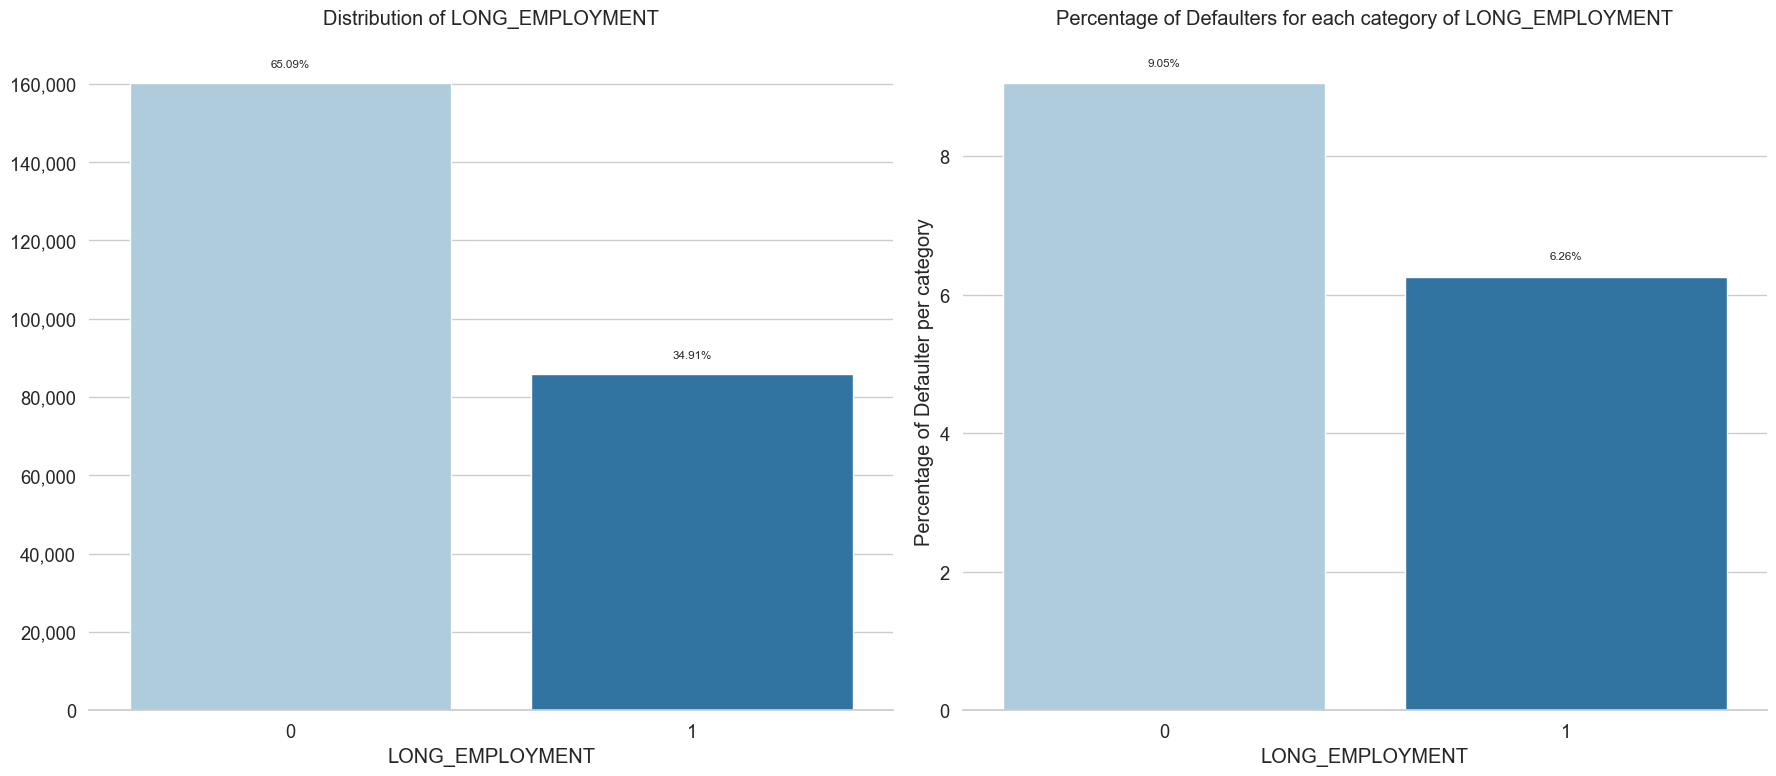

In [298]:
plot_categorical_bar_vertical(app_train, 'LONG_EMPLOYMENT')

- The rate of inability to repay debt for customers who have worked less than 2000 days is 9.05%, while for customers who have worked for more than 2000 days, this rate drops to 6.26%.

- This may indicate a trend that customers who have worked for a long time are more likely to repay their debts on time than those who have worked for a short time.

---
### 5.15. REGION_RATING

REGION_RATING_CLIENT only considers the region and not the city.

REGION_RATING_CLIENT_W_CITY considers both region and city, providing a more comprehensive view of the credit risk level or financial quality of the customer's area.

These 2 variables receive values of 1, 2 or 3, in which:
+ **Value 1** can be an areas with the lowest credit risk or best quality.
+ **Value 2** can be an area with average credit risk or average quality.
+ **Value 3** can be an areas with high credit risk or poor quality.

### a. REGION_RATING_CLIENT

----------------------------------------------------------------------------------------------------
The unique categories of 'REGION_RATING_CLIENT' are: 
[1 2 3]
----------------------------------------------------------------------------------------------------
Counts of each category are: 
REGION_RATING_CLIENT
2    181591
3     38681
1     25737
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of REGION_RATING_CLIENT = 3


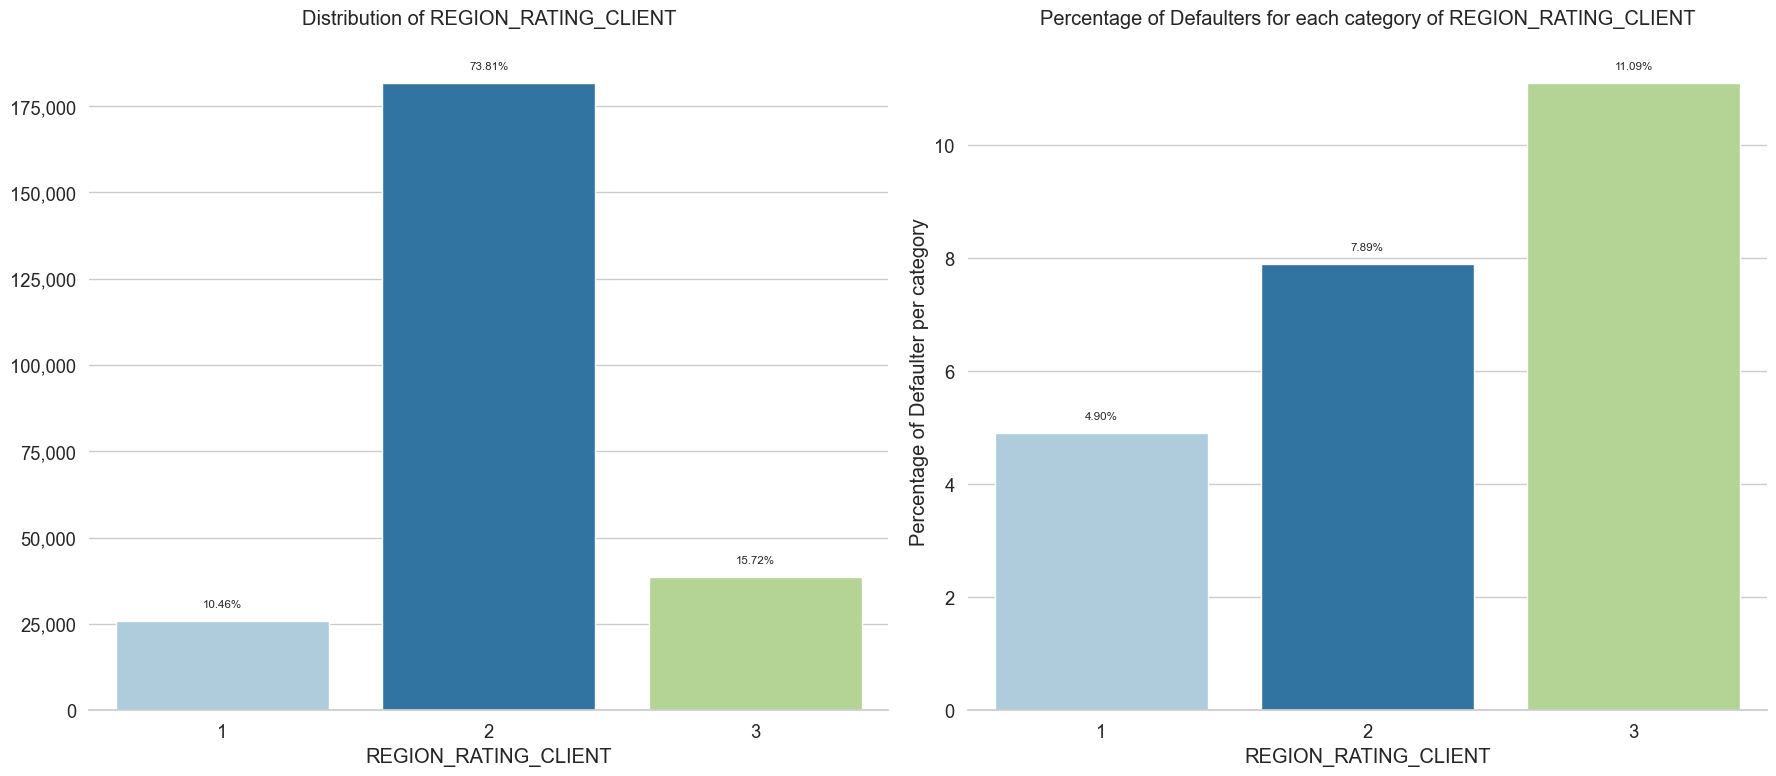

In [299]:
print_unique_categories(app_train, 'REGION_RATING_CLIENT', show_counts=True)
plot_categorical_bar_vertical(app_train, 'REGION_RATING_CLIENT')

### b. REGION_RATING_CLIENT_W_CITY

----------------------------------------------------------------------------------------------------
The unique categories of 'REGION_RATING_CLIENT_W_CITY' are: 
[1 2 3]
----------------------------------------------------------------------------------------------------
Counts of each category are: 
REGION_RATING_CLIENT_W_CITY
2    183593
3     35105
1     27311
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of REGION_RATING_CLIENT_W_CITY = 3


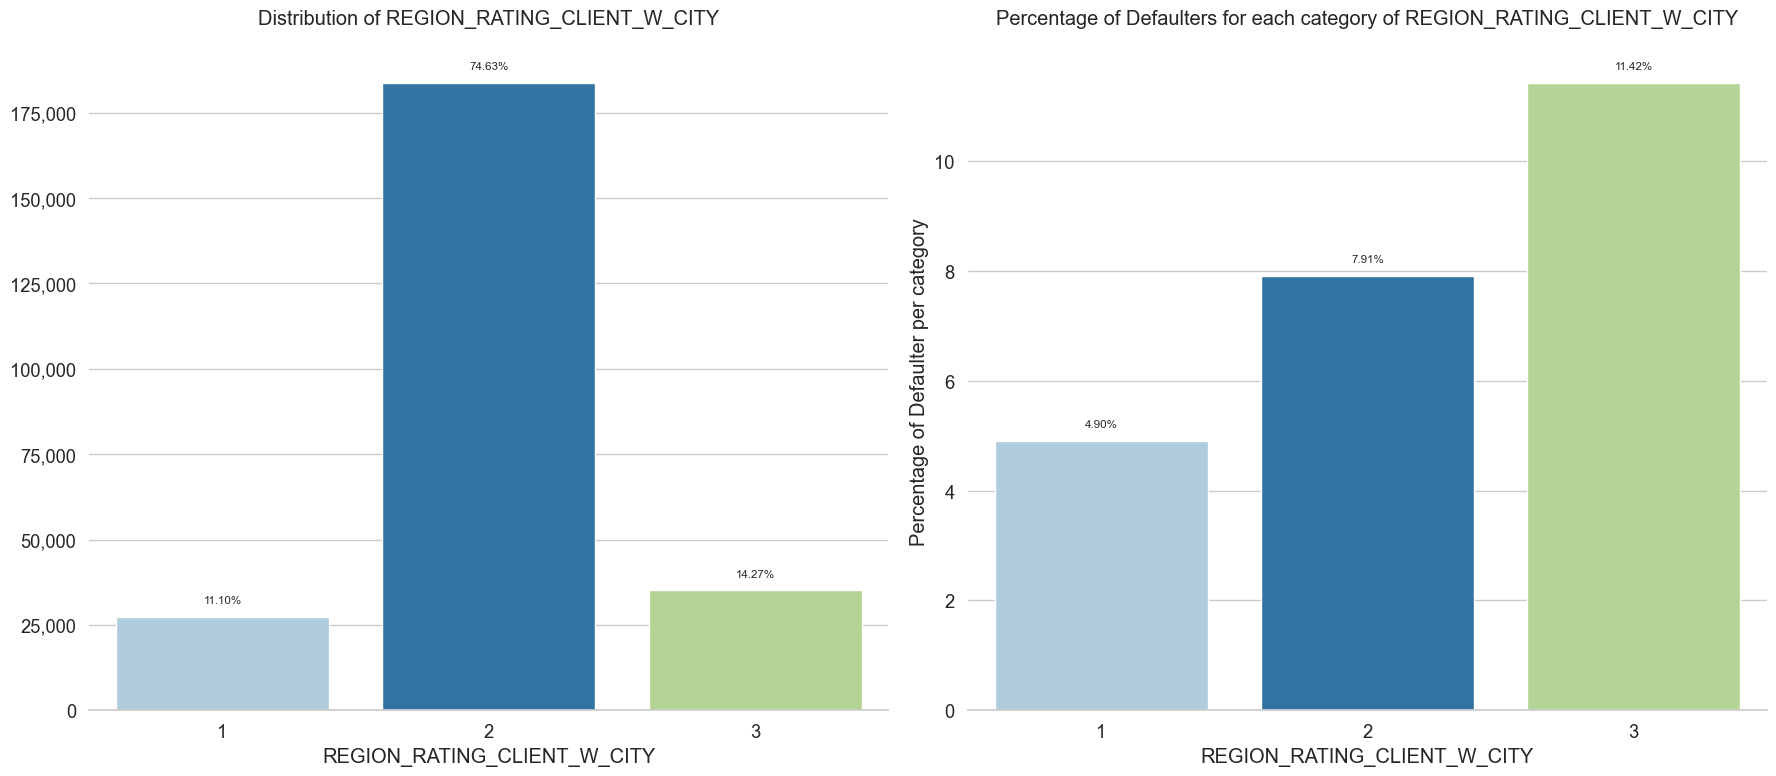

In [300]:
print_unique_categories(app_train, 'REGION_RATING_CLIENT_W_CITY', show_counts=True)
plot_categorical_bar_vertical(app_train, 'REGION_RATING_CLIENT_W_CITY')

Similarities can be seen between the two variables (whether or not city area is considered).

- First, we see that the majority of customers are rated in region 2 (about 74.63%), and very few customers are ranked in the remaining 2 regions (respectively area 1, area 3).

- However, if we look at the second chart, we see that the highest percentage of defaulters belongs to customers in areas rated level 3, followed by areas with level 2 and ranked last are areas with level 1.

This, proves that the bank has ranked the region quite consistently, regardless of whether the city is taken into account or not. Banks can use this information to determine overall credit risk levels at the regional level.

---
### 5.16. REGION REGISTERED NOT LIVE REGION & NOT WORK REGION

### a. REG_REGION_NOT_LIVE_REGION
- Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)

Total Number of unique categories of REG_REGION_NOT_LIVE_REGION = 2


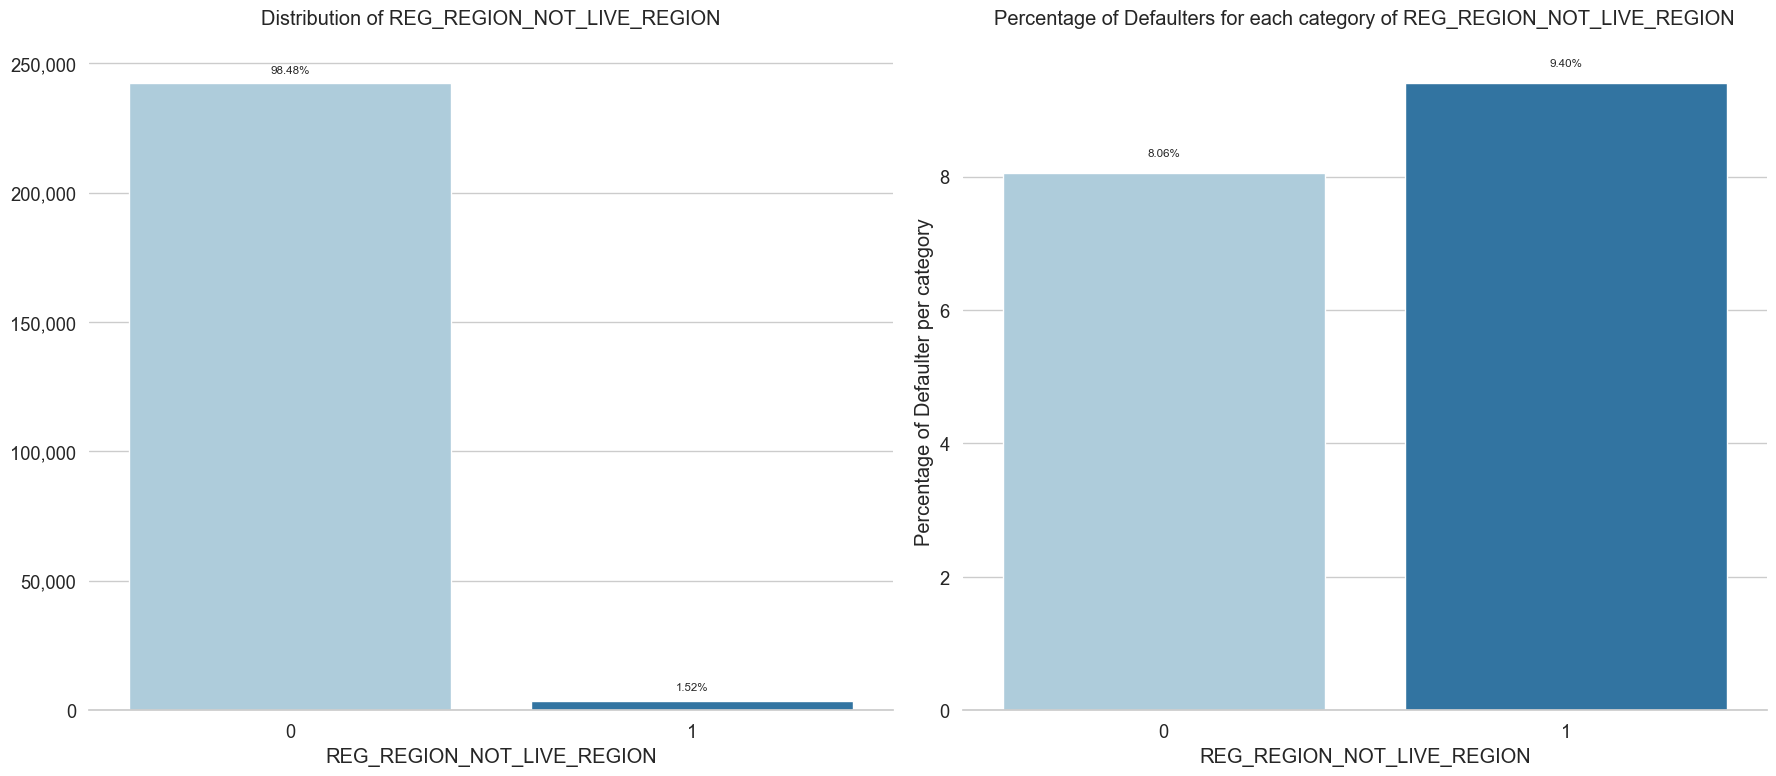

In [301]:
# print_unique_categories(app_train, 'REG_REGION_NOT_LIVE_REGION', show_counts=True)
# calculate_perc_categories(app_train, ['REG_REGION_NOT_LIVE_REGION'], 'TARGET')
plot_categorical_bar_vertical(app_train, 'REG_REGION_NOT_LIVE_REGION')

### b. REG_REGION_NOT_WORK_REGION
- Flag if client's permanent address does not match work address (1=different, 0=same, at region level)

Total Number of unique categories of REG_REGION_NOT_WORK_REGION = 2


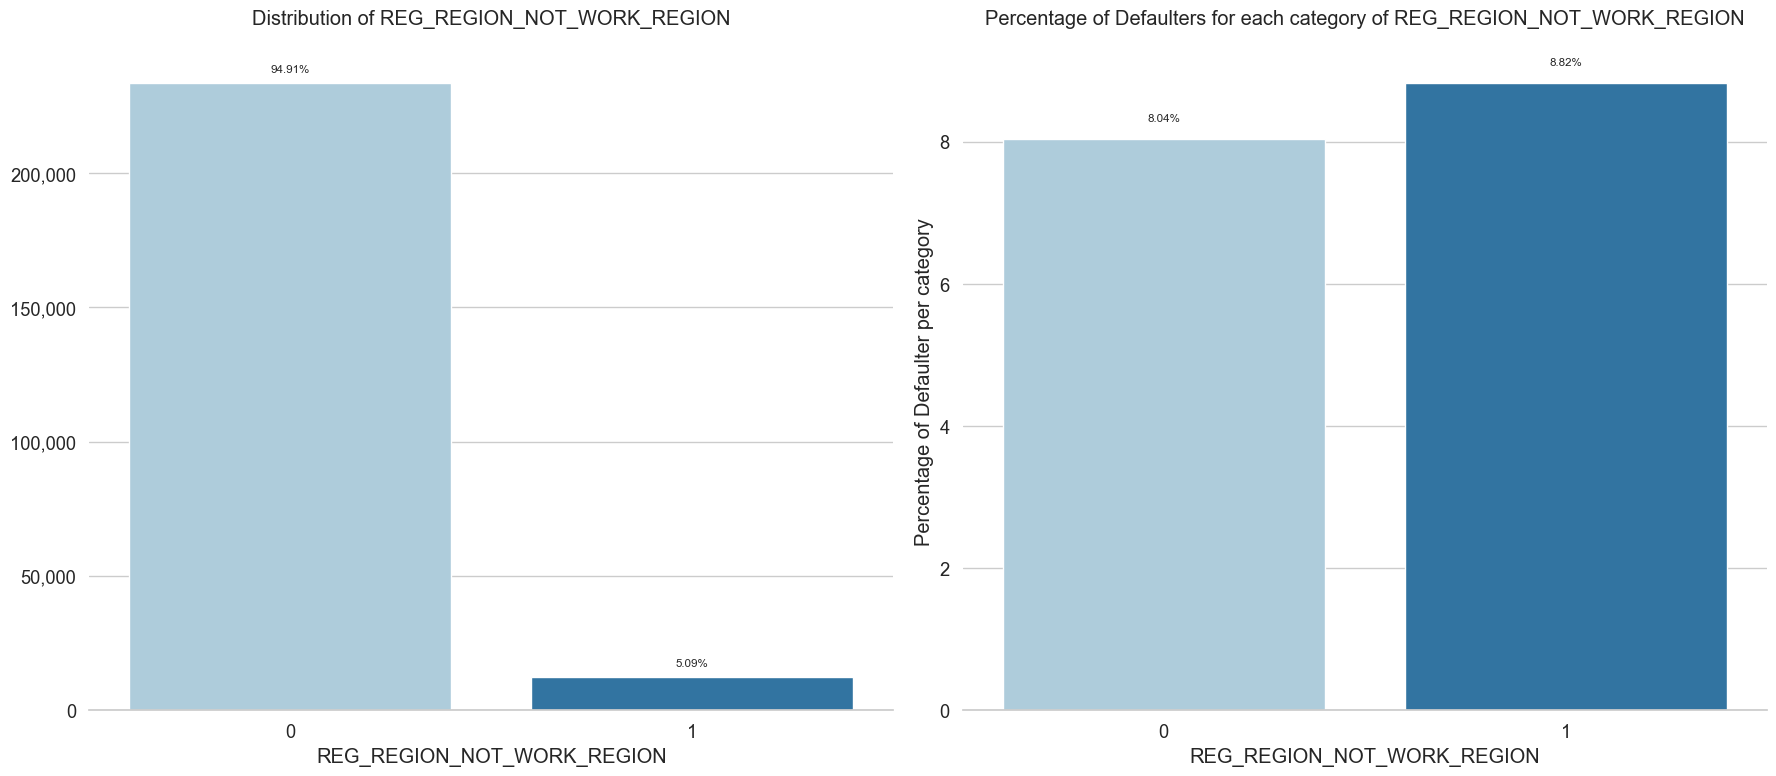

In [302]:
plot_categorical_bar_vertical(app_train, 'REG_REGION_NOT_WORK_REGION')

client's permanent address: địa chỉ thường trú nhé

- Phân tích cho thấy có sự tương đồng trong phân phối của hai biến này. Đa số hồ sơ khách hàng có địa chỉ liên lạc và địa chỉ làm việc giống với địa chỉ thường trú, chiếm tỷ lệ lớn lần lượt là 96% và 94%.

- Còn số lượng hồ sơ khách hàng có địa chỉ liên lạc và địa chỉ làm việc khác với địa chỉ thường trú chiếm 1 phần nhỏ trong tổng số các bộ hồ sơ vay (lần lượt là 1.52% và 5.09%). Mặc dù chiếm số lượng ít nhưng lại có tỉ lệ vỡ nợ cao hơn.

- Tuy nhiên sự chênh lệch tỉ lệ vỡ nợ giữa 2 nhóm khách hàng này ở cả 2 biến là không đáng kể.

client's permanent address: permanent address

- Analysis shows that there are similarities in the distribution of these two variables. The majority of customer profiles have the same contact address and working address as their permanent address, accounting for a large proportion of 96% and 94% respectively.

- The number of customer documents with contact and working addresses different from their permanent residence accounts for a small portion of the total loan documents (1.52% and 5.09%, respectively). Although they are small in number, they have a higher default rate.

- However, the difference in default rate between these two customer groups in both variables is insignificant.

---
### 5.17. CITY REGISTERED NOT LIVE CITY & NOT WORK REGION

### a. REG_CITY_NOT_LIVE_CITY
- Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)

Total Number of unique categories of REG_CITY_NOT_LIVE_CITY = 2


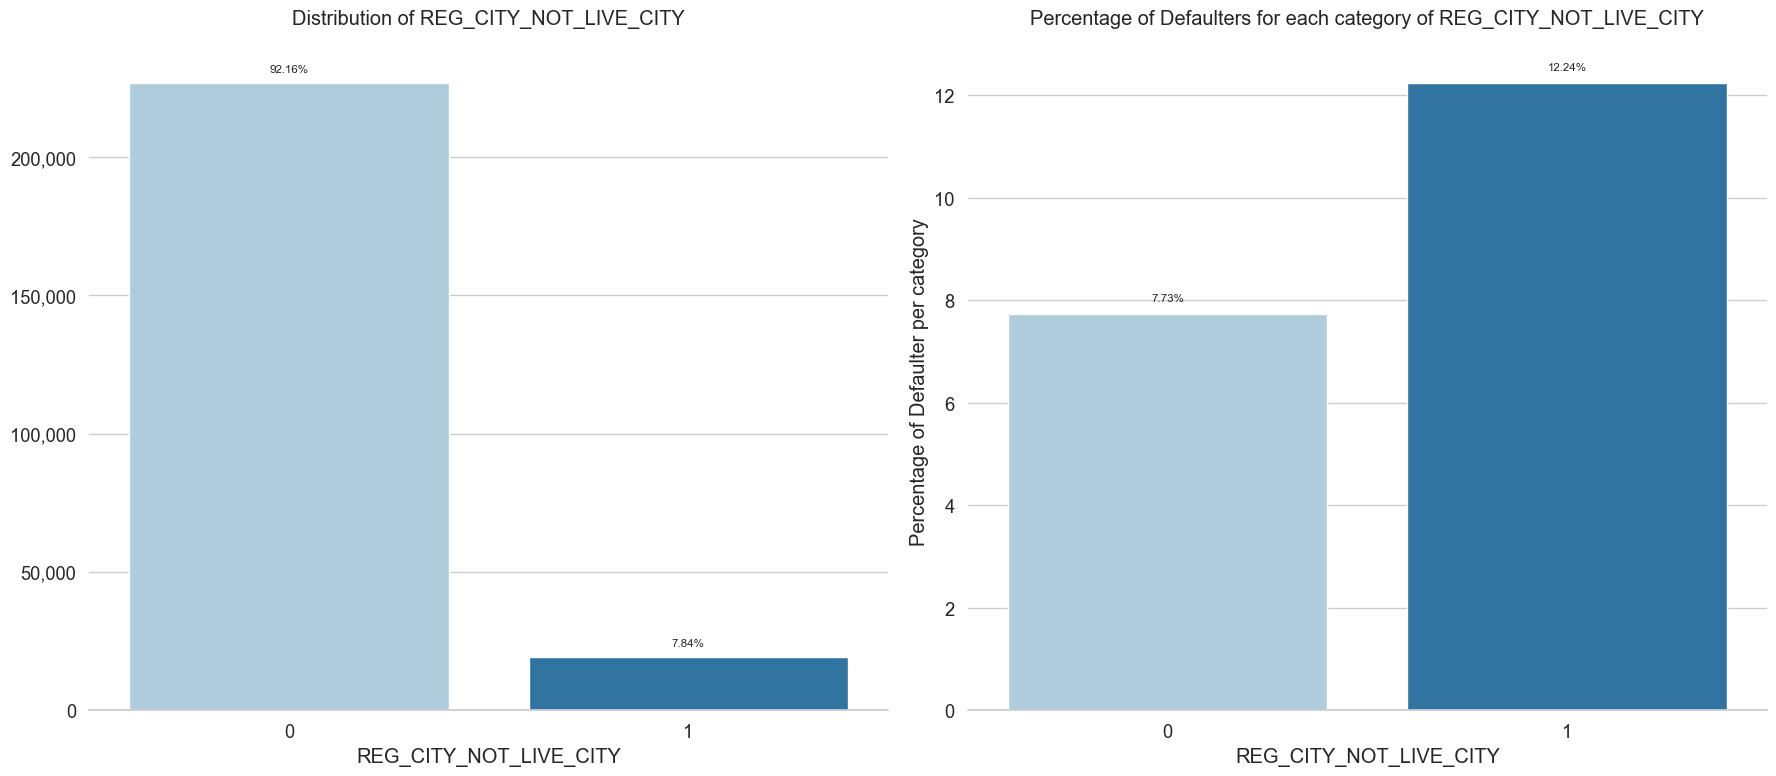

In [303]:
# print_unique_categories(app_train, 'REG_CITY_NOT_LIVE_CITY', show_counts=True)
# calculate_perc_categories(app_train, ['REG_CITY_NOT_LIVE_CITY'], 'TARGET')
plot_categorical_bar_vertical(app_train, 'REG_CITY_NOT_LIVE_CITY')

### b. REG_CITY_NOT_WORK_CITY
- Flag if client's permanent address does not match work address (1=different, 0=same, at city level)

Total Number of unique categories of REG_CITY_NOT_WORK_CITY = 2


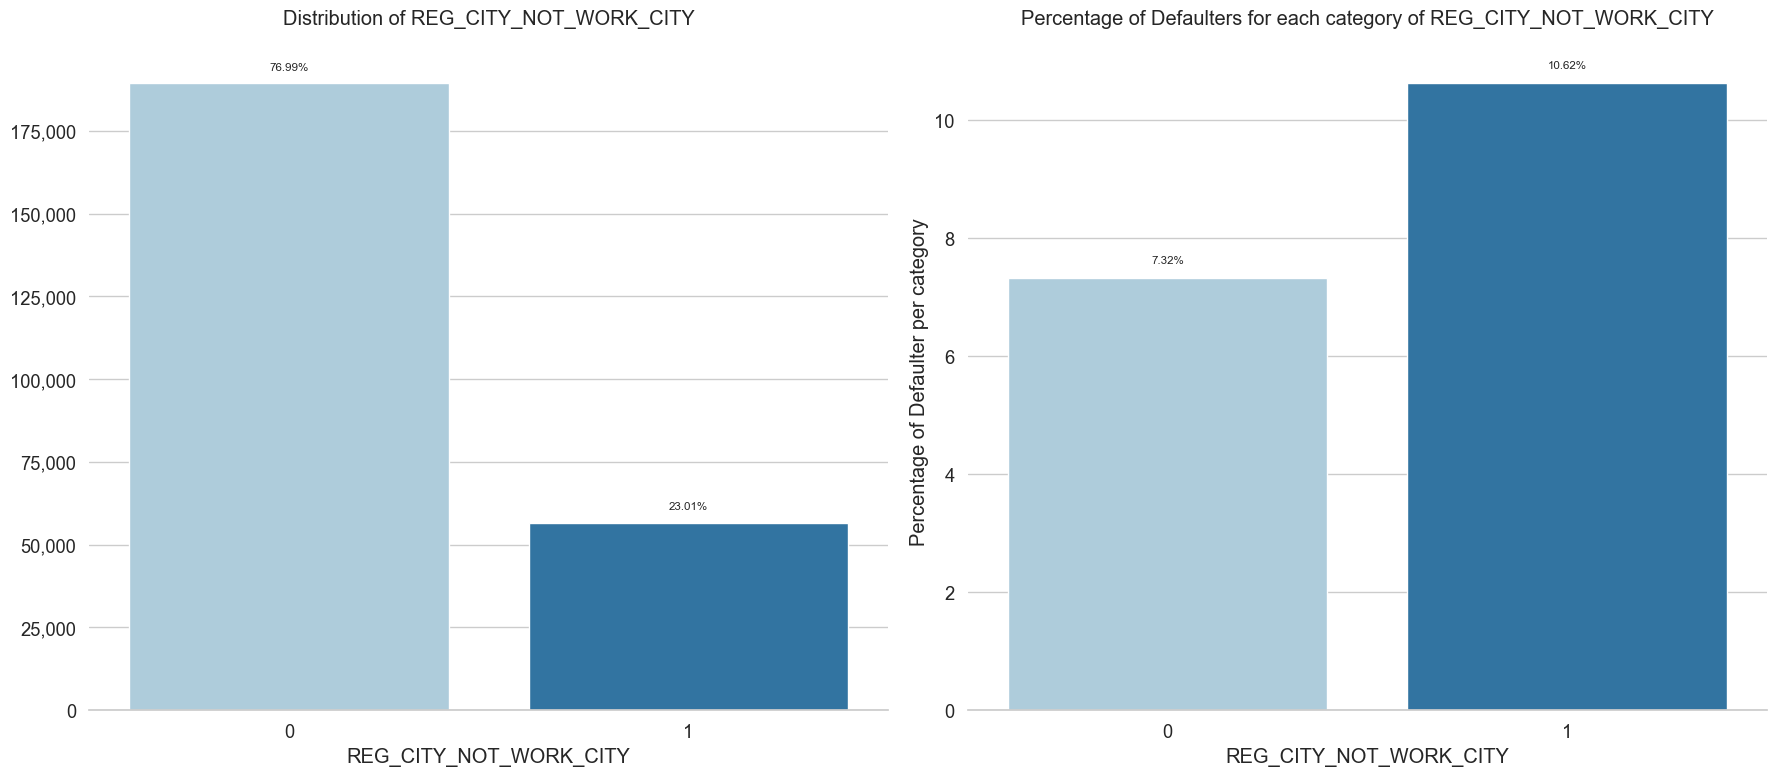

In [304]:
plot_categorical_bar_vertical(app_train, 'REG_CITY_NOT_WORK_CITY')

- Ở đây, chúng ta cũng thấy rằng có sự tương đồng trong phân phối của hai biến này. Tuy nhiên sự chênh lệch tỉ lệ vỡ nợ giữa 2 nhóm khách hàng này lại có sự khác biệt khá lớn.

- Cụ thể, khách hàng có địa chỉ liên lạc và địa chỉ làm việc trùng với địa điểm thường trú ở khu vực thành phố chiếm phần lớn bộ dữ liệu (lần lượt là 92% và 76%).

- Tỉ lệ vỡ nợ của khách hàng nhóm 1 (không trùng với địa điểm thường trú) cao hơn hẳn so với khách hàng nhóm 0.
    + REG_CITY_NOT_LIVE_CITY: tỉ lệ vỡ nợ nhóm 0, 1 lần lượt là 7.73%, 12.24%
    + REG_CITY_NOT_WORK_CITY: tỉ lệ vỡ nợ nhóm 0, 1 lần lượt là 7.32%, 10.62%

- Sự chênh lệch dao động khoảng 3-5% (khá rõ ràng).

- Here, we also see that there is a similarity in the distribution of these two variables. However, the difference in default rate between these two groups of customers is quite large.

- Specifically, customers whose contact and work addresses coincide with their permanent residence in the city area account for the majority of the data set (92% and 76%, respectively).

- The default rate of group 1 customers (not the same as their permanent residence) is much higher than that of group 0 customers.

    + REG_CITY_NOT_LIVE_CITY: default rate of groups 0 and 1 are 7.73%, 12.24% respectively.
    + REG_CITY_NOT_WORK_CITY: default rate of groups 0 and 1 are 7.32%, 10.62% respectively.
    
- The difference fluctuates around 3-5% (quite clear).

---
### 5.18. EXT_SOURCE_1 / EXT_SOURCE_2 / EXT_SOURCE_3

In [305]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.154135,-0.158824,-0.180096,0.077633
EXT_SOURCE_1,-0.154135,1.000000,0.214697,0.189890,-0.600012
EXT_SOURCE_2,-0.158824,0.214697,1.000000,0.110416,-0.092282
EXT_SOURCE_3,-0.180096,0.189890,0.110416,1.000000,-0.204244
DAYS_BIRTH,0.077633,-0.600012,-0.092282,-0.204244,1.000000


---

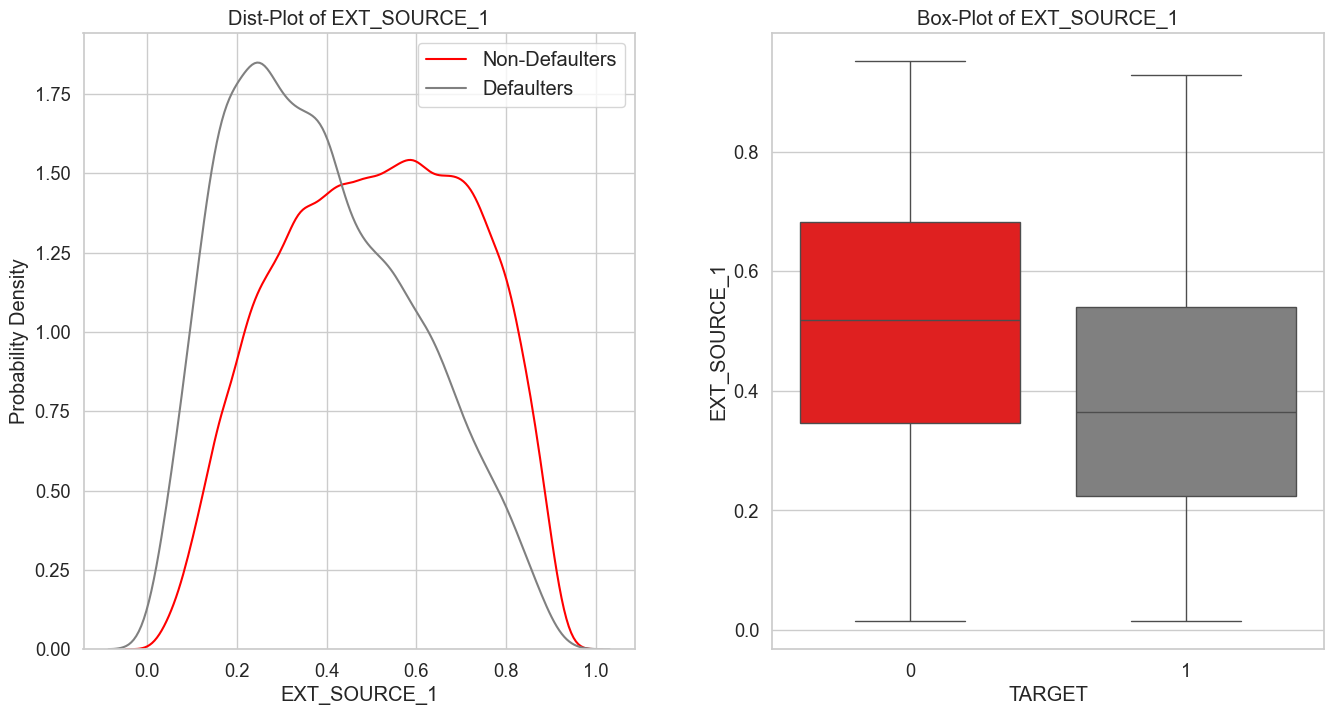

In [306]:
plot_continuous_variables(app_train, 'EXT_SOURCE_1', plots = ['distplot', 'box'], figsize = (16,8))

---

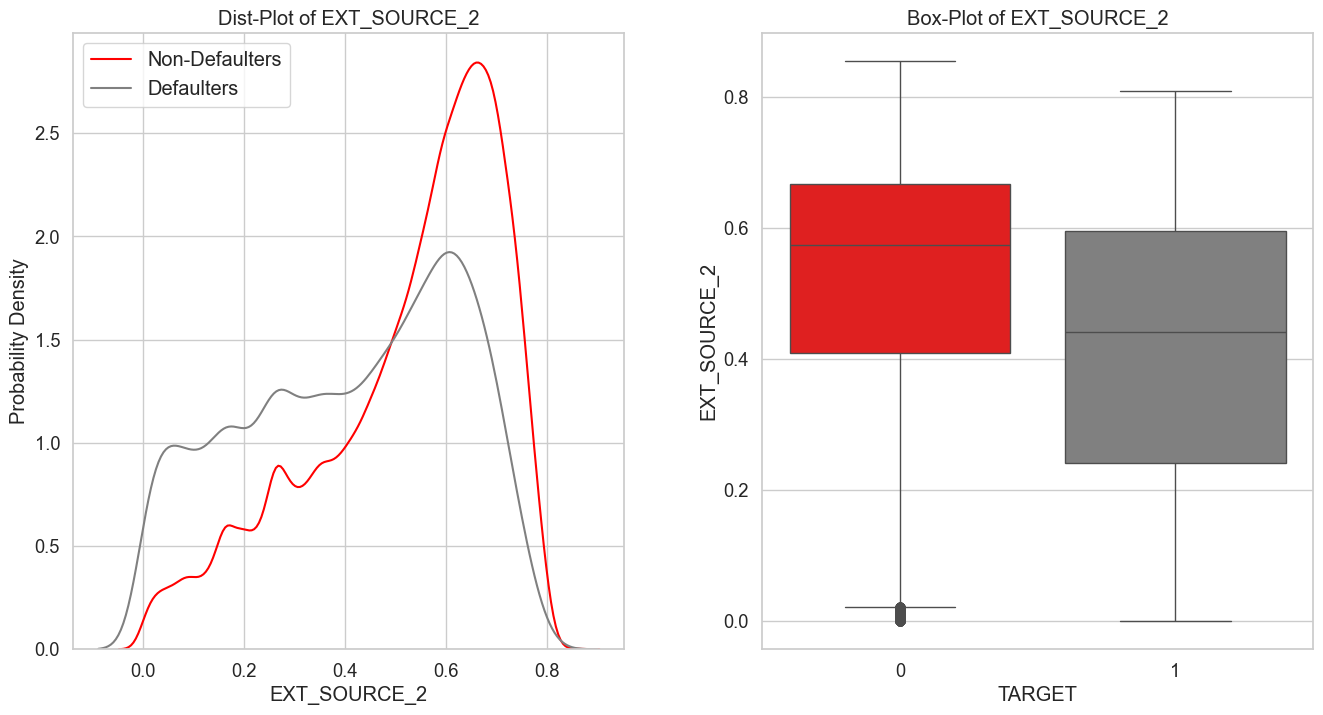

In [307]:
plot_continuous_variables(app_train, 'EXT_SOURCE_2', plots = ['distplot', 'box'], figsize = (16,8))

---

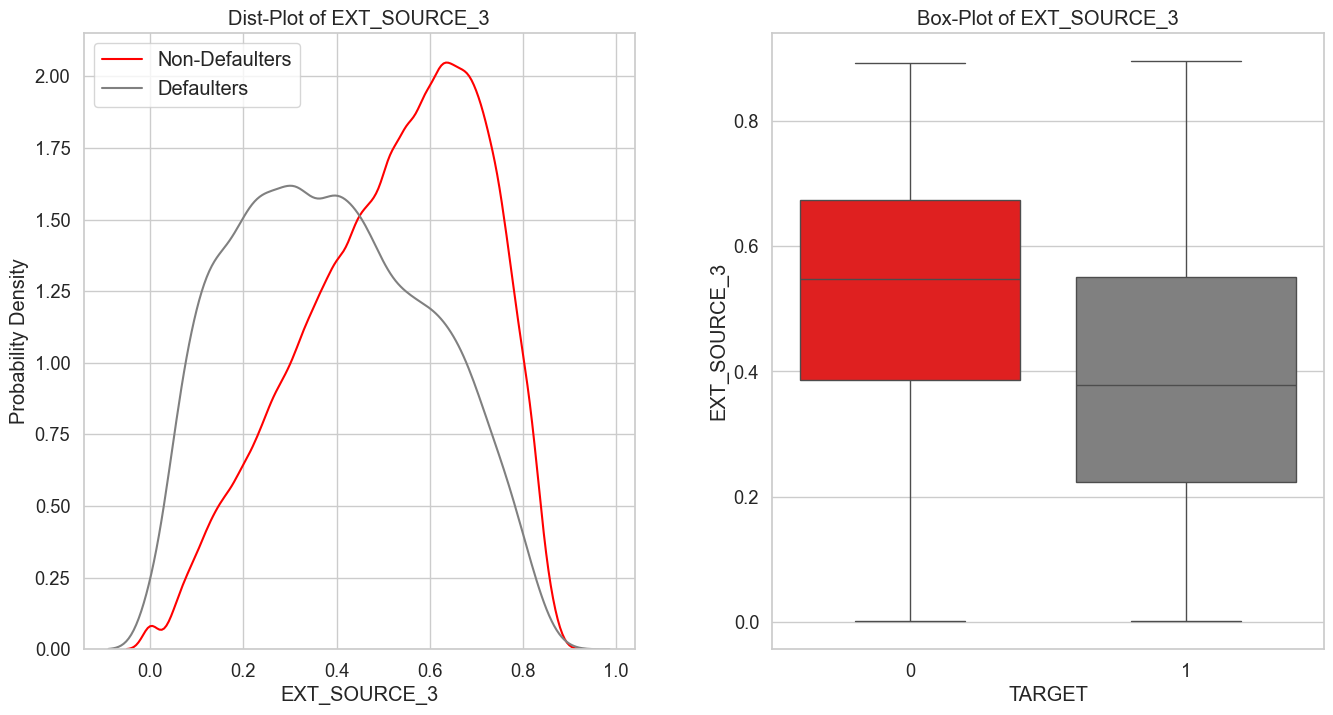

In [308]:
plot_continuous_variables(app_train, 'EXT_SOURCE_3', plots = ['distplot', 'box'], figsize = (16,8))


From the above three plots, we can draw following conclusions:

- If we look at the box-plots, we can clearly see a similar trend for all three EXT_SOURCE columns, which is that the Defaulters tend to have considerably lower values.

- This trend can also be seen with the PDFs. The Non-Defaulters show a higher peak at high EXT_SOURCE values, and the Probability Densities are very low for low values. This implies that Non-Defaulters generally have high values of these scores.

- It is interesting to note that the median value for defaulters is almost equal to or lower than 25th percentile values of Non-Defaulters.

- EXT_SOURCE_1 and EXT_SOURCE_3 columns tend to show better discrimination/separability as compared to EXT_SOURCE_2.
These 3 features look to be best separating the Defaulters and Non-Defaulters linearly among all the features so far.

---
### 5.19. FLAG_DOCUMENT_X
Documents provided by customers:
- 0: not provided
- 1: provided

In [309]:
flag_document_df = app_train.loc[:, app_train.columns.str.contains('DOCUMENT')]
flag_document_df.head(5)

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [310]:
missing_values_table(flag_document_df)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [311]:
percent_result_list = []

for col in flag_document_df:
    count_1 = flag_document_df[col].value_counts()[1]
    count_0 = flag_document_df[col].value_counts()[0]
    total_rows = flag_document_df.shape[0]

    #tính percentage
    percent_1 = np.round((count_1*100/total_rows), 2)
    percent_0 = np.round((100-percent_1), 2)

    percent_result_list.append({
        "Column": col,
        "Percentage of 1's": percent_1,
        "Percentage of 0's": percent_0
    })

results_df = pd.DataFrame(percent_result_list)
results_df

,Column,Percentage of 1's,Percentage of 0's
0,FLAG_DOCUMENT_2,0.00,100.00
1,FLAG_DOCUMENT_3,70.99,29.01
2,FLAG_DOCUMENT_4,0.01,99.99
3,FLAG_DOCUMENT_5,1.52,98.48
4,FLAG_DOCUMENT_6,8.80,91.20
5,FLAG_DOCUMENT_7,0.02,99.98
6,FLAG_DOCUMENT_8,8.11,91.89
7,FLAG_DOCUMENT_9,0.39,99.61
8,FLAG_DOCUMENT_10,0.00,100.00
9,FLAG_DOCUMENT_11,0.39,99.61


- The percentage of customers who have submitted relevant documents is very small in most document types.

- FLAG_DOCUMENT_3 can be considered to keep.

Total Number of unique categories of FLAG_DOCUMENT_3 = 2


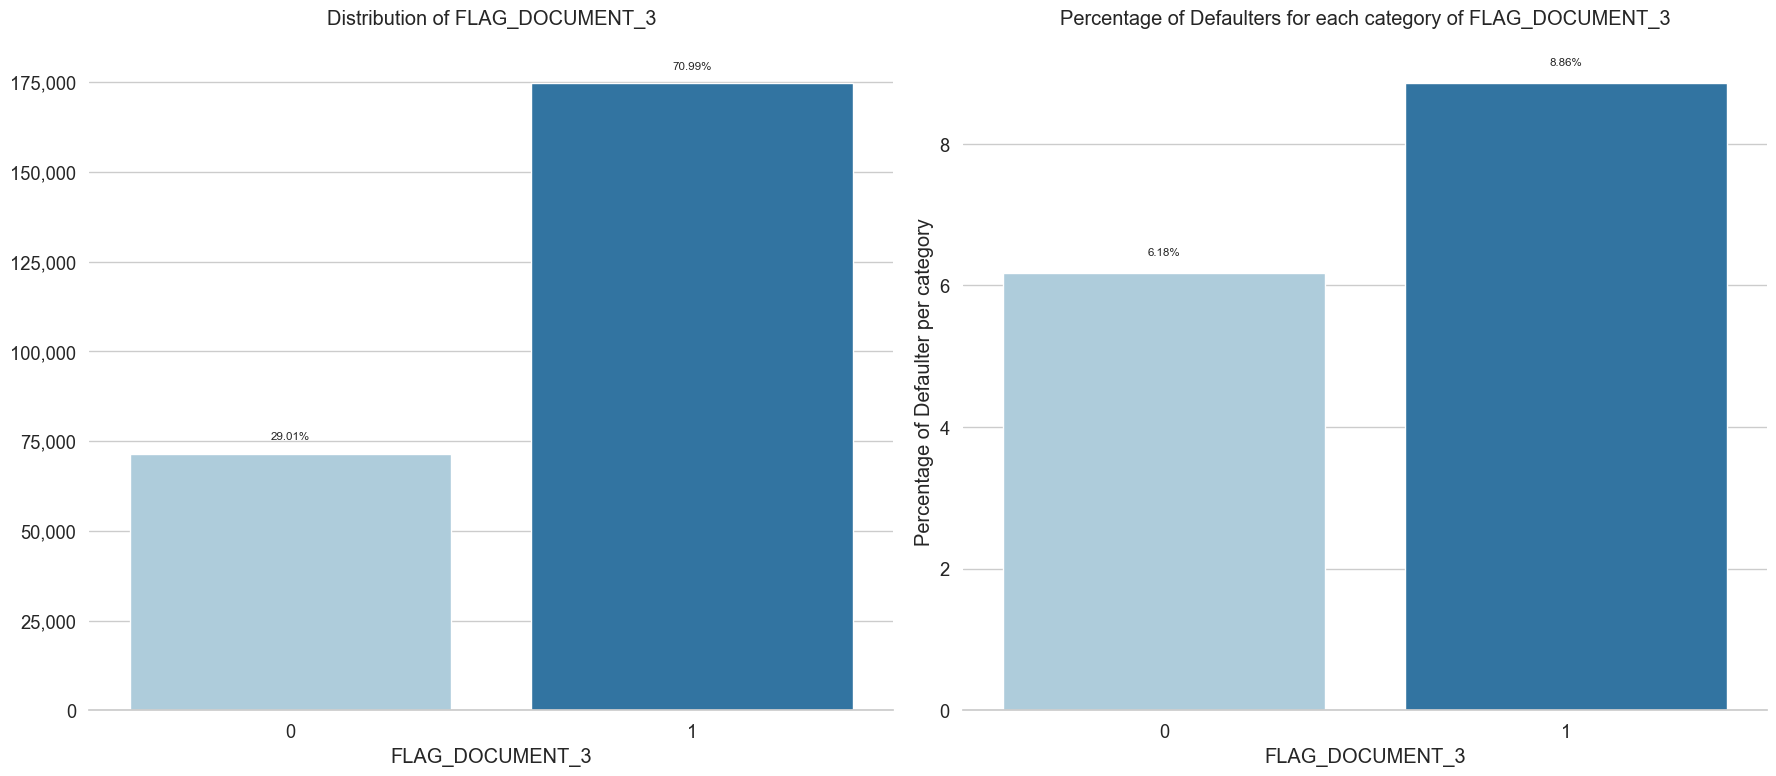

In [312]:
plot_categorical_bar_vertical(app_train, 'FLAG_DOCUMENT_3')

- We found that most customers provided this document (~71%) and only 29% of customers did not provide this document.

- However, we see that those who provided this documentation had a higher default rate than those who did not. This means that applicants who provided FLAG_DOCUMENT_3 were more likely to default than those who did not.

---
### 5.20. RETIREMENT AGE

In [313]:
app_train['RETIREMENT_AGE'] = (app_train['DAYS_BIRTH'] < -14000).astype(int)

In [314]:
retirement = app_train[['RETIREMENT_AGE', 'TARGET']]
# retirement.groupby(['RETIREMENT_AGE']).mean()

Total Number of unique categories of RETIREMENT_AGE = 2


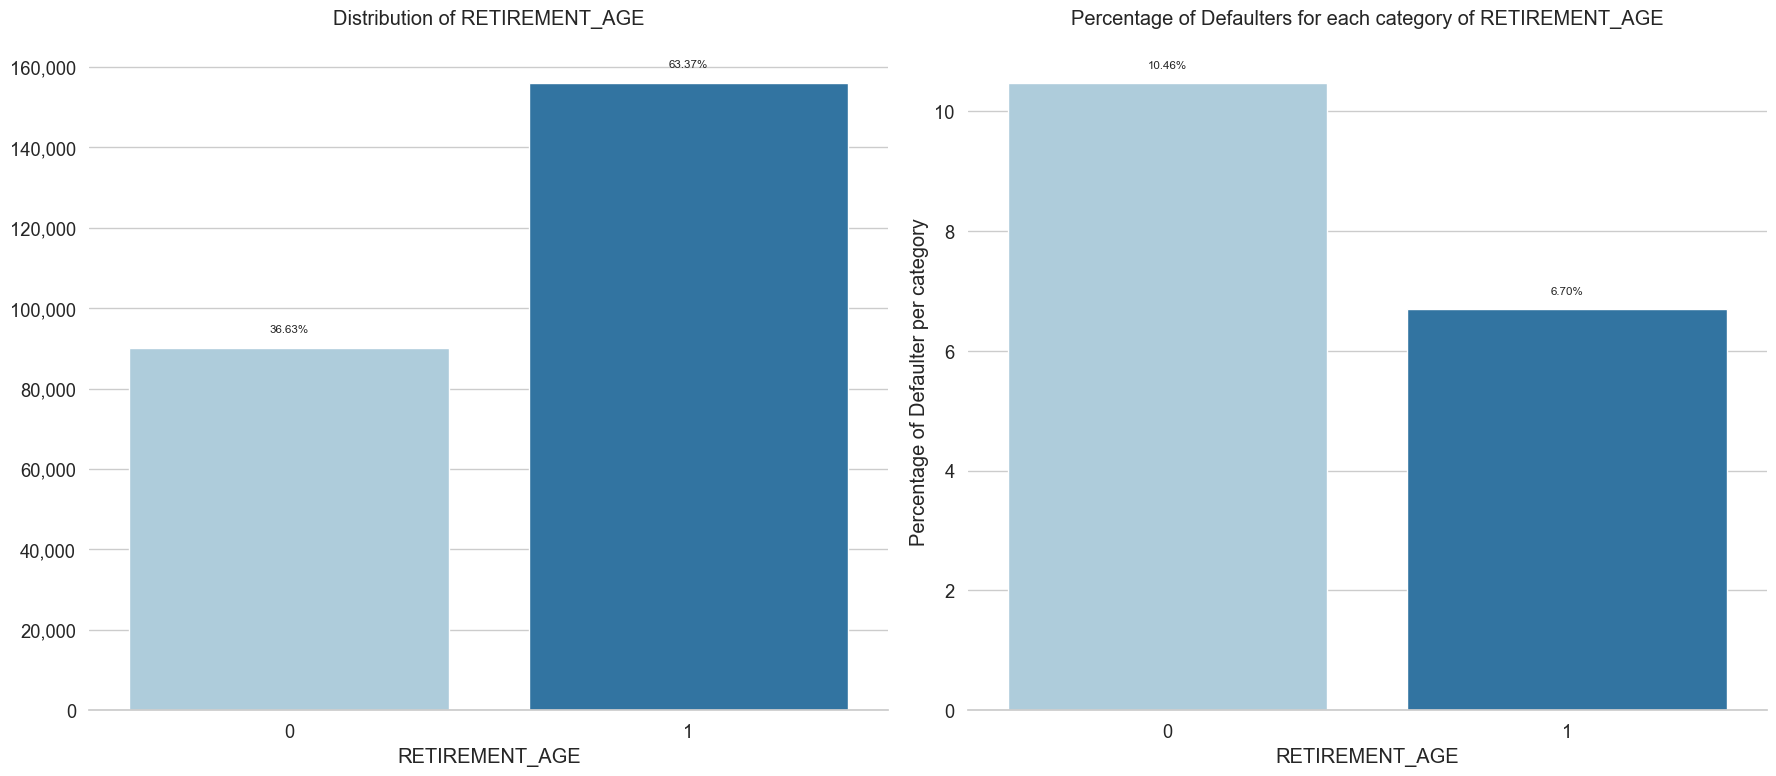

In [315]:
plot_categorical_bar_vertical(retirement, 'RETIREMENT_AGE')

- comment

---
### 5.21. INCOME BAND

In [316]:
bins = [0, 30000, 65000, 95000, 130000, 160000, 190880, 220000, 275000, 325000, np.inf]
labels = range(1, 11)
app_train['INCOME_BAND'] = pd.cut(app_train['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=False)

In [317]:
income_table = app_train[['AMT_INCOME_TOTAL', 'INCOME_BAND', 'CNT_CHILDREN', 'TARGET']]
income_table

,AMT_INCOME_TOTAL,INCOME_BAND,CNT_CHILDREN,TARGET
0,270000.0,8,0,0
1,135000.0,5,0,0
2,121500.0,4,0,0
3,99000.0,4,0,0
4,360000.0,10,0,0
...,...,...,...,...
246004,157500.0,5,0,0
246005,72000.0,3,0,0
246006,153000.0,5,0,0
246007,171000.0,6,0,1


In [318]:
income_table.groupby(['INCOME_BAND']).mean()

,AMT_INCOME_TOTAL,CNT_CHILDREN,TARGET
INCOME_BAND,,,
1,27925.725664,0.274336,0.053097
2,51171.115935,0.308509,0.075752
3,81937.815204,0.406471,0.082872
4,112881.833456,0.401647,0.087155
5,144455.764156,0.418919,0.085745
6,177933.438339,0.424379,0.083740
7,203456.729960,0.411235,0.081258
8,241765.686974,0.432848,0.072485
9,305276.519088,0.437162,0.065315


Total Number of unique categories of INCOME_BAND = 10


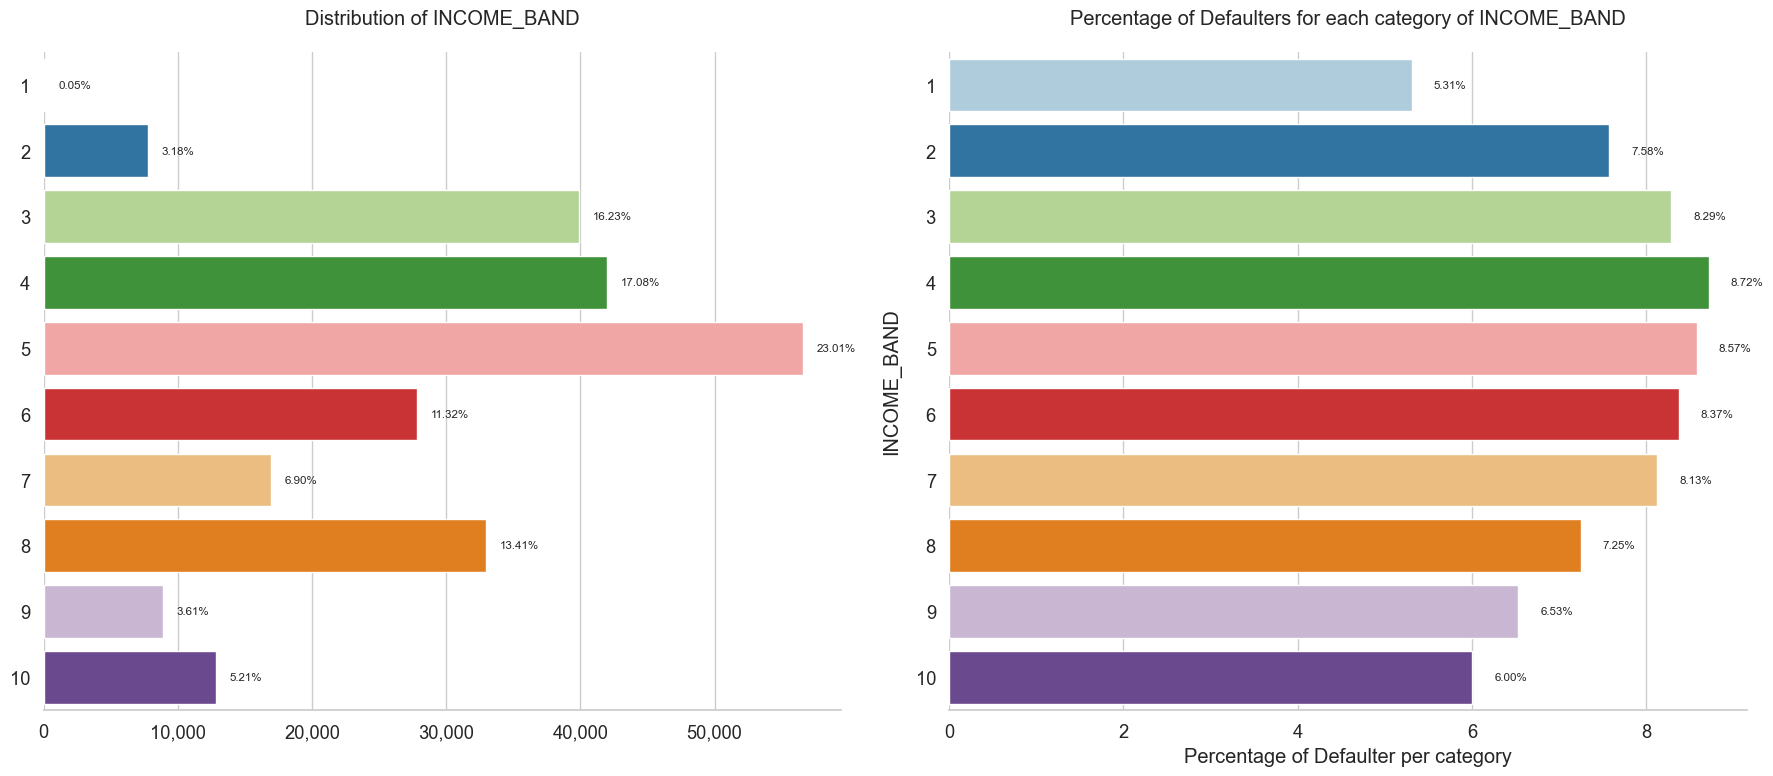

In [319]:
plot_categorical_bar_horizontal(income_table, 'INCOME_BAND')